# Análise de diversidades por Universidade

## Imports e funções

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_style('whitegrid')

In [2]:
replace_map = {
    'TP_SITUACAO': {2: "Cursando",
                    3: "Matrícula trancada",
                    4: "Desvinculado do curso",
                    5: "Transferido para outro \n curso da mesma IES",
                    6: "Formado",
                    7: "Falecido"},
    'TP_SEXO' : {1: "Feminino", 2: "Masculino"}
}

colors = [(0.62, 0.0, 0.26), (0.89, 0.32, 0.29), (0.99, 0.65, 0.36), (1, 0.90, 0.44), (0.59, 0.73, 0.38), (0.64, 0.85, 0.64), (0.28, 0.63, 0.70), (0.37, 0.31, 0.64)]
cm = LinearSegmentedColormap.from_list('Spectral', colors)

def bar_plot_lines(dataframe, param1, param2, param3, param4, colormap=""):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  if colormap != "":
    # colormap = plt.cm.nipy_spectral
    # colors = [colormap(i) for i in np.linspace(0, 1, len(df[param2].unique()))]
    data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), colormap=colormap, fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
  else:
    data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
        
  plt.ylabel(param3, fontsize = 20)
  plt.xlabel(param4, fontsize = 20)

  xposition = [0.5 + i for i in range(len(df[param1].unique()))]
  for xc in xposition:
      plt.axvline(x=xc, color='gray', linestyle=':')
    
def bar_plot_lines_stacked_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30), sort_params=['Feminino', 'Masculino']):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  data.groupby(param2)[param1].value_counts().unstack(0).sort_values(by=sort_params).plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", stacked=True, xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]).legend(prop={'size': 12})
  plt.ylabel(param3, fontsize = 16)
  plt.xlabel(param4, fontsize = 16)
  xposition = [10 + (i)*10 for i in range(tick_amout//10)]


def bar_plot_lines_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30)):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  data.groupby(param2)[param1].value_counts().unstack(0)\
    .plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]) \
    .legend(prop={'size': 12})
  plt.ylabel(param3, fontsize = 16)
  plt.xlabel(param4, fontsize = 16)
  xposition = [10 + (i)*10 for i in range(tick_amout//10)]

In [3]:
df = pd.read_csv('../../Datasets/inep_tic/alunos_curso_2015_2019_tic.csv')
df.head()

NU_ANO_CENSO  CO_IES  TP_CATEGORIA_ADMINISTRATIVA  \
0          2015     585                          1.0   
1          2015     585                          1.0   
2          2015     585                          1.0   
3          2015     585                          1.0   
4          2015     585                          1.0   

   TP_ORGANIZACAO_ACADEMICA  CO_CURSO  CO_CURSO_POLO  TP_TURNO  \
0                       1.0   14217.0            NaN       4.0   
1                       1.0   14217.0            NaN       4.0   
2                       1.0   14217.0            NaN       4.0   
3                       1.0   14217.0            NaN       4.0   
4                       1.0   14217.0            NaN       4.0   

   TP_GRAU_ACADEMICO  TP_MODALIDADE_ENSINO  TP_NIVEL_ACADEMICO  ...  \
0                1.0                   1.0                 1.0  ...   
1                1.0                   1.0                 1.0  ...   
2                1.0                   1.0                 1.0  ...   
3                1.0                   1.0                 1.0  ...   
4                1.0                   1.0                 1.0  ...   

  CO_PAIS_DESTINO IN_MATRICULA  IN_CONCLUINTE  IN_INGRESSO_TOTAL  \
0             NaN          1.0            1.0                0.0   
1             NaN          1.0            0.0                0.0   
2             NaN          1.0            0.0                0.0   
3             NaN          1.0            0.0                0.0   
4             NaN          1.0            0.0                0.0   

   IN_INGRESSO_VAGA_NOVA  IN_INGRESSO_PROCESSO_SELETIVO  NU_ANO_INGRESSO  \
0                    0.0                            NaN           2007.0   
1                    0.0                            NaN           2012.0   
2                    0.0                            NaN           2012.0   
3                    0.0                            NaN           2011.0   
4                    0.0                            NaN           2010.0   

   CO_UF               NO_CURSO  SG_IES  
0   42.0  CIÊNCIA DA COMPUTAÇÃO    UFSC  
1   42.0  CIÊNCIA DA COMPUTAÇÃO    UFSC  
2   42.0  CIÊNCIA DA COMPUTAÇÃO    UFSC  
3   42.0  CIÊNCIA DA COMPUTAÇÃO    UFSC  
4   42.0  CIÊNCIA DA COMPUTAÇÃO    UFSC  

[5 rows x 108 columns]

In [4]:
df.groupby(['CO_IES', 'SG_IES']).size()

CO_IES  SG_IES        
43      UDESC             6545
76      FURB              2010
585     UFSC              7766
3162    IFSC              2883
4756    USJ               1026
5036    IF Catarinense    7104
15121   UFFS              2348
dtype: int64

In [5]:
df.IN_DEFICIENCIA_SURDOCEGUEIRA.unique()

array([nan,  0.])

In [5]:
replace_map = {
    'TP_COR_RACA':{
        0: 'Não quis declarar',  
        1: 'Branca',
        2: 'Preta',
        3: 'Parda',
        4: 'Amarela',
        5: 'Indígena',
        9: 'Sem informação'
    }
}

In [6]:
df.replace(replace_map, inplace=True)

## Preparando dados de forma de ingresso e reserva

In [8]:

# colunas = ['IN_DEFICIENCIA_AUDITIVA',
# 'IN_DEFICIENCIA_FISICA',
# 'IN_DEFICIENCIA_INTELECTUAL',
# 'IN_DEFICIENCIA_MULTIPLA',
# 'IN_DEFICIENCIA_SURDEZ',
# 'IN_DEFICIENCIA_SURDOCEGUEIRA',
# 'IN_DEFICIENCIA_BAIXA_VISAO',
# 'IN_DEFICIENCIA_CEGUEIRA',
# 'IN_DEFICIENCIA_SUPERDOTACAO',
# 'IN_TGD_AUTISMO',
# 'IN_TGD_SINDROME_ASPERGER',
# 'IN_TGD_SINDROME_RETT',
# 'IN_TGD_TRANSTOR_DESINTEGRATIVO']
# colunas = ['IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 
#  'IN_DEFICIENCIA_INTELECTUAL', 'IN_TGD_SINDROME_ASPERGER']
# colunas = ['IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 
#  'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
#  'IN_RESERVA_OUTRA']
colunas = ['IN_INGRESSO_AVALIACAO_SERIADA','IN_INGRESSO_ENEM', 'IN_INGRESSO_VESTIBULAR', 
   'IN_INGRESSO_SELECAO_SIMPLIFICA', 'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
   'IN_INGRESSO_VAGA_PROG_ESPECIAL', 'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL',
   'IN_INGRESSO_CONVENIO_PECG', 'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']
universidades, anos, categoria, valor, qt_abs, media = [], [], [], [], [], []
for uni in df.SG_IES.unique():
    for ano in range(2015, 2020):
        df_uni = df.loc[(df.SG_IES == uni) & (df.NU_ANO_CENSO == ano)]
        for i in range(len(colunas)):
            anos.append(ano)
            universidades.append(uni)
            df_uni_cat = df_uni.loc[df_uni[colunas[i]] == 1]
            valor.append(colunas[i])
            categoria.append('forma_ingresso')
            valor_abs = df_uni_cat.groupby([colunas[i]]).size().values.tolist()
            if len(valor_abs) > 0:
                qt_abs.append(sum(valor_abs))
                total = df_uni.groupby(['NU_ANO_CENSO']).size().values.tolist()
                media.append((100*sum(valor_abs)/sum(total)))
            else:
                qt_abs.append(0)
                media.append(0)
            
            # for j in range(len(valores[i])):
            #     if colunas[i] == 'NU_IDADE':
            #         if j-1 == -1:
            #             valor.append(f'até {valores[i][j]} anos')
            #             print(0,valores[i][j] )
            #             df_uni_cat = df_uni.loc[(df_uni[colunas[i]] >= 0) & (df_uni[colunas[i]] < valores[i][j])]
            #             print(df_uni_cat.groupby([colunas[i]]).size().values)
            #         else:
            #             print(valores[i][j-1],valores[i][j] )
            #             valor.append(f'{valores[i][j-1]} - {valores[i][j]-1} anos')
            #             df_uni_cat = df_uni.loc[(df_uni[colunas[i]] >= valores[i][j-1]) & (df_uni[colunas[i]] < valores[i][j])]
            #             print(df_uni_cat.groupby([colunas[i]]).size().values)
            #     else:
            #         valor.append(valores[i][j])
            #         df_uni_cat = df_uni.loc[df_uni[colunas[i]] == valores[i][j]]
            #         print('---- não é idade -----')
            #         print(df_uni_cat.groupby([colunas[i]]).size().values)
                    
            #     valor_abs = df_uni_cat.groupby([colunas[i]]).size().values.tolist()
                
            #     universidades.append(uni)
            #     anos.append(ano)
            #     categoria.append(colunas[i])
                
            #     if len(valor_abs) > 0:
            #         qt_abs.append(sum(valor_abs))
                
            #         total = df_uni.groupby(['NU_ANO_CENSO']).size().values.tolist()
            #         # print(total)    
            #         print(valor_abs, sum(valor_abs))
            #         media.append((100*sum(valor_abs)/sum(total)))
            #     else:
            #         qt_abs.append(0)
            #         media.append(0)
                    
df_forma_ingresso = pd.DataFrame({'universidade':universidades, 'ano':anos, 
                                 'categoria':categoria, 'valor': valor,
                                 'qt_abs':qt_abs, 'media':media})
df_forma_ingresso.sample(10)

universidade   ano       categoria                           valor  \
166            UFFS  2018  forma_ingresso             IN_INGRESSO_EGRESSO   
75   IF Catarinense  2016  forma_ingresso  IN_INGRESSO_SELECAO_SIMPLIFICA   
357             USJ  2019  forma_ingresso       IN_INGRESSO_CONVENIO_PECG   
156            UFFS  2018  forma_ingresso   IN_INGRESSO_AVALIACAO_SERIADA   
256           UDESC  2016  forma_ingresso  IN_INGRESSO_OUTRO_TIPO_SELECAO   
197            IFSC  2016  forma_ingresso       IN_INGRESSO_VAGA_REMANESC   
381            FURB  2016  forma_ingresso       IN_INGRESSO_CONVENIO_PECG   
288           UDESC  2019  forma_ingresso   IN_INGRESSO_AVALIACAO_SERIADA   
395            FURB  2017  forma_ingresso         IN_INGRESSO_OUTRA_FORMA   
291           UDESC  2019  forma_ingresso  IN_INGRESSO_SELECAO_SIMPLIFICA   

     qt_abs      media  
166       0   0.000000  
75      294  22.391470  
357       0   0.000000  
156       0   0.000000  
256       0   0.000000  
197      19   5.397727  
381       0   0.000000  
288       0   0.000000  
395       0   0.000000  
291       0   0.000000

In [9]:
pd.set_option('display.max_rows', None)
df_forma_ingresso

universidade   ano       categoria                           valor  \
0              UFSC  2015  forma_ingresso   IN_INGRESSO_AVALIACAO_SERIADA   
1              UFSC  2015  forma_ingresso                IN_INGRESSO_ENEM   
2              UFSC  2015  forma_ingresso          IN_INGRESSO_VESTIBULAR   
3              UFSC  2015  forma_ingresso  IN_INGRESSO_SELECAO_SIMPLIFICA   
4              UFSC  2015  forma_ingresso  IN_INGRESSO_OUTRO_TIPO_SELECAO   
5              UFSC  2015  forma_ingresso       IN_INGRESSO_VAGA_REMANESC   
6              UFSC  2015  forma_ingresso  IN_INGRESSO_VAGA_PROG_ESPECIAL   
7              UFSC  2015  forma_ingresso    IN_INGRESSO_TRANSF_EXOFFICIO   
8              UFSC  2015  forma_ingresso    IN_INGRESSO_DECISAO_JUDICIAL   
9              UFSC  2015  forma_ingresso       IN_INGRESSO_CONVENIO_PECG   
10             UFSC  2015  forma_ingresso             IN_INGRESSO_EGRESSO   
11             UFSC  2015  forma_ingresso         IN_INGRESSO_OUTRA_FORMA   
12             UFSC  2016  forma_ingresso   IN_INGRESSO_AVALIACAO_SERIADA   
13             UFSC  2016  forma_ingresso                IN_INGRESSO_ENEM   
14             UFSC  2016  forma_ingresso          IN_INGRESSO_VESTIBULAR   
15             UFSC  2016  forma_ingresso  IN_INGRESSO_SELECAO_SIMPLIFICA   
16             UFSC  2016  forma_ingresso  IN_INGRESSO_OUTRO_TIPO_SELECAO   
17             UFSC  2016  forma_ingresso       IN_INGRESSO_VAGA_REMANESC   
18             UFSC  2016  forma_ingresso  IN_INGRESSO_VAGA_PROG_ESPECIAL   
19             UFSC  2016  forma_ingresso    IN_INGRESSO_TRANSF_EXOFFICIO   
20             UFSC  2016  forma_ingresso    IN_INGRESSO_DECISAO_JUDICIAL   
21             UFSC  2016  forma_ingresso       IN_INGRESSO_CONVENIO_PECG   
22             UFSC  2016  forma_ingresso             IN_INGRESSO_EGRESSO   
23             UFSC  2016  forma_ingresso         IN_INGRESSO_OUTRA_FORMA   
24             UFSC  2017  forma_ingresso   IN_INGRESSO_AVALIACAO_SERIADA   
25             UFSC  2017  forma_ingresso                IN_INGRESSO_ENEM   
26             UFSC  2017  forma_ingresso          IN_INGRESSO_VESTIBULAR   
27             UFSC  2017  forma_ingresso  IN_INGRESSO_SELECAO_SIMPLIFICA   
28             UFSC  2017  forma_ingresso  IN_INGRESSO_OUTRO_TIPO_SELECAO   
29             UFSC  2017  forma_ingresso       IN_INGRESSO_VAGA_REMANESC   
30             UFSC  2017  forma_ingresso  IN_INGRESSO_VAGA_PROG_ESPECIAL   
31             UFSC  2017  forma_ingresso    IN_INGRESSO_TRANSF_EXOFFICIO   
32             UFSC  2017  forma_ingresso    IN_INGRESSO_DECISAO_JUDICIAL   
33             UFSC  2017  forma_ingresso       IN_INGRESSO_CONVENIO_PECG   
34             UFSC  2017  forma_ingresso             IN_INGRESSO_EGRESSO   
35             UFSC  2017  forma_ingresso         IN_INGRESSO_OUTRA_FORMA   
36             UFSC  2018  forma_ingresso   IN_INGRESSO_AVALIACAO_SERIADA   
37             UFSC  2018  forma_ingresso                IN_INGRESSO_ENEM   
38             UFSC  2018  forma_ingresso          IN_INGRESSO_VESTIBULAR   
39             UFSC  2018  forma_ingresso  IN_INGRESSO_SELECAO_SIMPLIFICA   
40             UFSC  2018  forma_ingresso  IN_INGRESSO_OUTRO_TIPO_SELECAO   
41             UFSC  2018  forma_ingresso       IN_INGRESSO_VAGA_REMANESC   
42             UFSC  2018  forma_ingresso  IN_INGRESSO_VAGA_PROG_ESPECIAL   
43             UFSC  2018  forma_ingresso    IN_INGRESSO_TRANSF_EXOFFICIO   
44             UFSC  2018  forma_ingresso    IN_INGRESSO_DECISAO_JUDICIAL   
45             UFSC  2018  forma_ingresso       IN_INGRESSO_CONVENIO_PECG   
46             UFSC  2018  forma_ingresso             IN_INGRESSO_EGRESSO   
47             UFSC  2018  forma_ingresso         IN_INGRESSO_OUTRA_FORMA   
48             UFSC  2019  forma_ingresso   IN_INGRESSO_AVALIACAO_SERIADA   
49             UFSC  2019  forma_ingresso                IN_INGRESSO_ENEM   
50             UFSC  2019  forma_ingresso          IN_INGRESSO_VESTIBULAR   
51 

In [45]:
df_reserva_vagas.loc[df_reserva_vagas.valor == 'IN_RESERVA_DEFICIENCIA']

universidade   ano      categoria                   valor  qt_abs  \
1              UFSC  2015  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
6              UFSC  2016  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
11             UFSC  2017  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
16             UFSC  2018  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
21             UFSC  2019  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
26   IF Catarinense  2015  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
31   IF Catarinense  2016  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
36   IF Catarinense  2017  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
41   IF Catarinense  2018  reserva_vagas  IN_RESERVA_DEFICIENCIA       1   
46   IF Catarinense  2019  reserva_vagas  IN_RESERVA_DEFICIENCIA       2   
51             UFFS  2015  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
56             UFFS  2016  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
61             UFFS  2017  reserva_vagas  IN_RESERVA_DEFICIENCIA       2   
66             UFFS  2018  reserva_vagas  IN_RESERVA_DEFICIENCIA       2   
71             UFFS  2019  reserva_vagas  IN_RESERVA_DEFICIENCIA       2   
76             IFSC  2015  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
81             IFSC  2016  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
86             IFSC  2017  reserva_vagas  IN_RESERVA_DEFICIENCIA       1   
91             IFSC  2018  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
96             IFSC  2019  reserva_vagas  IN_RESERVA_DEFICIENCIA       1   
101           UDESC  2015  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
106           UDESC  2016  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
111           UDESC  2017  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
116           UDESC  2018  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
121           UDESC  2019  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
126             USJ  2015  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
131             USJ  2016  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
136             USJ  2017  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
141             USJ  2018  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
146             USJ  2019  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
151            FURB  2015  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
156            FURB  2016  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
161            FURB  2017  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
166            FURB  2018  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   
171            FURB  2019  reserva_vagas  IN_RESERVA_DEFICIENCIA       0   

        media  
1    0.000000  
6    0.000000  
11   0.000000  
16   0.000000  
21   0.000000  
26   0.000000  
31   0.000000  
36   0.000000  
41   0.065574  
46   0.117647  
51   0.000000  
56   0.000000  
61   0.437637  
66   0.417537  
71   0.396825  
76   0.000000  
81   0.000000  
86   0.175439  
91   0.000000  
96   0.107643  
101  0.000000  
106  0.000000  
111  0.000000  
116  0.000000  
121  0.000000  
126  0.000000  
131  0.000000  
136  0.000000  
141  0.000000  
146  0.000000  
151  0.000000  
156  0.000000  
161  0.000000  
166  0.000000  
171  0.000000

In [182]:
df_ingresso = df[['IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM', 'IN_INGRESSO_AVALIACAO_SERIADA', 
   'IN_INGRESSO_SELECAO_SIMPLIFICA', 'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
   'IN_INGRESSO_VAGA_PROG_ESPECIAL', 'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL',
   'IN_INGRESSO_CONVENIO_PECG', 'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']]
df_ingresso = df_ingresso.fillna(0)

In [192]:
df.loc[(df.IN_INGRESSO_VESTIBULAR == 1) & (df.IN_INGRESSO_ENEM == 1)].values

array([[2017, 3162, 1.0, 4.0, 1330186.0, nan, 3.0, 3.0, 1.0, 1.0,
        '0615S02', '780BC29F6101510CCF1B350C9B8F3654', 40862151.0, nan,
        'Branca', 2.0, 1985.0, 11.0, 30.0, 32.0, 1.0, 76.0, 42.0,
        4209102.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, 2.0, 2500.0, 400.0, '01JUL2017:00:00:00', 1.0,
        1.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.0,
        nan, nan, nan, nan, nan, nan, nan, nan, 1.0, nan, nan, 2.0, 0.0,
        nan, nan, nan, nan, 1.0, 0.0, 1.0, 1.0, nan, 2017.0, 42.0,
        'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'IFSC']], dtype=object)

In [194]:
df_reserva = df[['IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 
 'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
 'IN_RESERVA_OUTRA']]

In [190]:
for row in df[['IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM', 'IN_INGRESSO_AVALIACAO_SERIADA', 
   'IN_INGRESSO_SELECAO_SIMPLIFICA', 'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
   'IN_INGRESSO_VAGA_PROG_ESPECIAL', 'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL',
   'IN_INGRESSO_CONVENIO_PECG', 'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']].values:
    if sum(row) != 1:
        print(sum(row), row)

nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0. nan nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0. nan nan]
nan [ 0.  0.  0.  0. nan  1.  0.  0.  0.  0. nan nan]
nan [ 1.  0.  0.  0. nan  0.

In [171]:
df.IN_INGRESSO_VESTIBULAR

0        1.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
29677    0.0
29678    0.0
29679    0.0
29680    0.0
29681    0.0
Name: IN_INGRESSO_VESTIBULAR, Length: 29682, dtype: float64

## Preparando base

In [10]:
colunas = ['TP_SEXO', 'IN_DEFICIENCIA', 'TP_COR_RACA', 'NU_IDADE']
valores = [[1, 2], 
           [0, 1],
           ['Não quis declarar', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Sem informação'],
           [18, 25, 35, 45, 60, 100]]

universidades, anos, categoria, valor, qt_abs, media = [], [], [], [], [], []
for uni in df.SG_IES.unique():
    for ano in range(2015, 2020):
        df_uni = df.loc[(df.SG_IES == uni) & (df.NU_ANO_CENSO == ano)]
        for i in range(len(colunas)):
            for j in range(len(valores[i])):
                if colunas[i] == 'NU_IDADE':
                    if j-1 == -1:
                        valor.append(f'até {valores[i][j]} anos')
                        print(0,valores[i][j] )
                        df_uni_cat = df_uni.loc[(df_uni[colunas[i]] >= 0) & (df_uni[colunas[i]] < valores[i][j])]
                        print(df_uni_cat.groupby([colunas[i]]).size().values)
                    else:
                        print(valores[i][j-1],valores[i][j] )
                        valor.append(f'{valores[i][j-1]} - {valores[i][j]-1} anos')
                        df_uni_cat = df_uni.loc[(df_uni[colunas[i]] >= valores[i][j-1]) & (df_uni[colunas[i]] < valores[i][j])]
                        print(df_uni_cat.groupby([colunas[i]]).size().values)
                else:
                    valor.append(valores[i][j])
                    df_uni_cat = df_uni.loc[df_uni[colunas[i]] == valores[i][j]]
                    print('---- não é idade -----')
                    print(df_uni_cat.groupby([colunas[i]]).size().values)
                    
                valor_abs = df_uni_cat.groupby([colunas[i]]).size().values.tolist()
                
                universidades.append(uni)
                anos.append(ano)
                categoria.append(colunas[i])
                
                if len(valor_abs) > 0:
                    qt_abs.append(sum(valor_abs))
                    # if colunas[i] == 'NU_IDADE':
                    #     if j-1 == -1:
                    #         total = df.loc[(df.SG_IES == uni) &
                    #                    (df.NU_ANO_CENSO == ano)] \
                    #             .groupby(['NU_ANO_CENSO']).size().values.tolist()
                    #         # total = df.loc[(df.SG_IES == uni) &
                    #         # (df[colunas[i]] >= 0) & 
                    #         # (df[colunas[i]] < valores[i][j])] \
                    #         #     .groupby(['NU_ANO_CENSO']).size().values.tolist()
                    #     else:
                    #         # total = df.loc[(df.SG_IES == uni) &
                    #         #     (df[colunas[i]] >= valores[i][j-1]) & 
                    #         #     (df[colunas[i]] < valores[i][j])] \
                    #         #         .groupby(['NU_ANO_CENSO']).size().values.tolist()
                    #         total = df.loc[(df.SG_IES == uni) &
                    #                    (df.NU_ANO_CENSO == ano)] \
                    #             .groupby(['NU_ANO_CENSO']).size().values.tolist()
                    # else:
                    #     # total = df.loc[(df.SG_IES == uni) &
                    #     #         (df[colunas[i]] == valores[i][j])] \
                    #     #             .groupby(['NU_ANO_CENSO']).size().values.tolist()
                    #     total = df.loc[(df.SG_IES == uni) &
                    #                    (df.NU_ANO_CENSO == ano)] \
                    #             .groupby(['NU_ANO_CENSO']).size().values.tolist()
                
                    total = df_uni.groupby(['NU_ANO_CENSO']).size().values.tolist()
                    # print(total)    
                    print(valor_abs, sum(valor_abs))
                    media.append((100*sum(valor_abs)/sum(total)))
                else:
                    qt_abs.append(0)
                    media.append(0)
                    
                    
                    # print(valor_abs)
        
    # print(df_uni_sexo)
    
df_universidades = pd.DataFrame({'universidade':universidades, 'ano':anos, 
                                 'categoria':categoria, 'valor': valor,
                                 'qt_abs':qt_abs, 'media':media})
df_universidades.sample(10)

---- não é idade -----
[238]
[238] 238
---- não é idade -----
[1362]
[1362] 1362
---- não é idade -----
[1594]
[1594] 1594
---- não é idade -----
[4]
[4] 4
---- não é idade -----
[8]
[8] 8
---- não é idade -----
[1375]
[1375] 1375
---- não é idade -----
[74]
[74] 74
---- não é idade -----
[121]
[121] 121
---- não é idade -----
[18]
[18] 18
---- não é idade -----
[3]
[3] 3
---- não é idade -----
[1]
[1] 1
0 18
[8]
[8] 8
18 25
[ 87 123 189 164 170 160 145]
[87, 123, 189, 164, 170, 160, 145] 1038
25 35
[96 97 85 41 47 42 27 16 24 11]
[96, 97, 85, 41, 47, 42, 27, 16, 24, 11] 486
35 45
[10 10  5  8  3  3  1  4  4  4]
[10, 10, 5, 8, 3, 3, 1, 4, 4, 4] 52
45 60
[1 2 2 1 3 2 2 1 1]
[1, 2, 2, 1, 3, 2, 2, 1, 1] 15
60 100
[1]
[1] 1
---- não é idade -----
[233]
[233] 233
---- não é idade -----
[1387]
[1387] 1387
---- não é idade -----
[1610]
[1610] 1610
---- não é idade -----
[10]
[10] 10
---- não é idade -----
[9]
[9] 9
---- não é idade -----
[1376]
[1376] 1376
---- não é idade -----
[74]
[74] 74


universidade   ano       categoria              valor  qt_abs  \
220            UFFS  2017        NU_IDADE       60 - 99 anos       0   
70             UFSC  2019  IN_DEFICIENCIA                  0    1448   
107  IF Catarinense  2016     TP_COR_RACA             Branca     956   
310            IFSC  2018     TP_COR_RACA  Não quis declarar      11   
184            UFFS  2015        NU_IDADE       35 - 44 anos      13   
204            UFFS  2017         TP_SEXO                  1      50   
128  IF Catarinense  2017     TP_COR_RACA           Indígena       2   
142  IF Catarinense  2018     TP_COR_RACA              Preta      63   
422           UDESC  2019        NU_IDADE       35 - 44 anos      56   
348           UDESC  2015     TP_COR_RACA            Amarela       8   

         media  
220   0.000000  
70   98.974710  
107  72.810358  
310   1.323706  
184   3.002309  
204  10.940919  
128   0.141143  
142   4.131148  
422   4.229607  
348   0.615858

In [ ]:
df_universidades

In [109]:
df_universidades.to_csv('../../Datasets/inep_tic/df_universidades_sc_tp_sexo.csv', index=False)

## Gráficos de Sexo

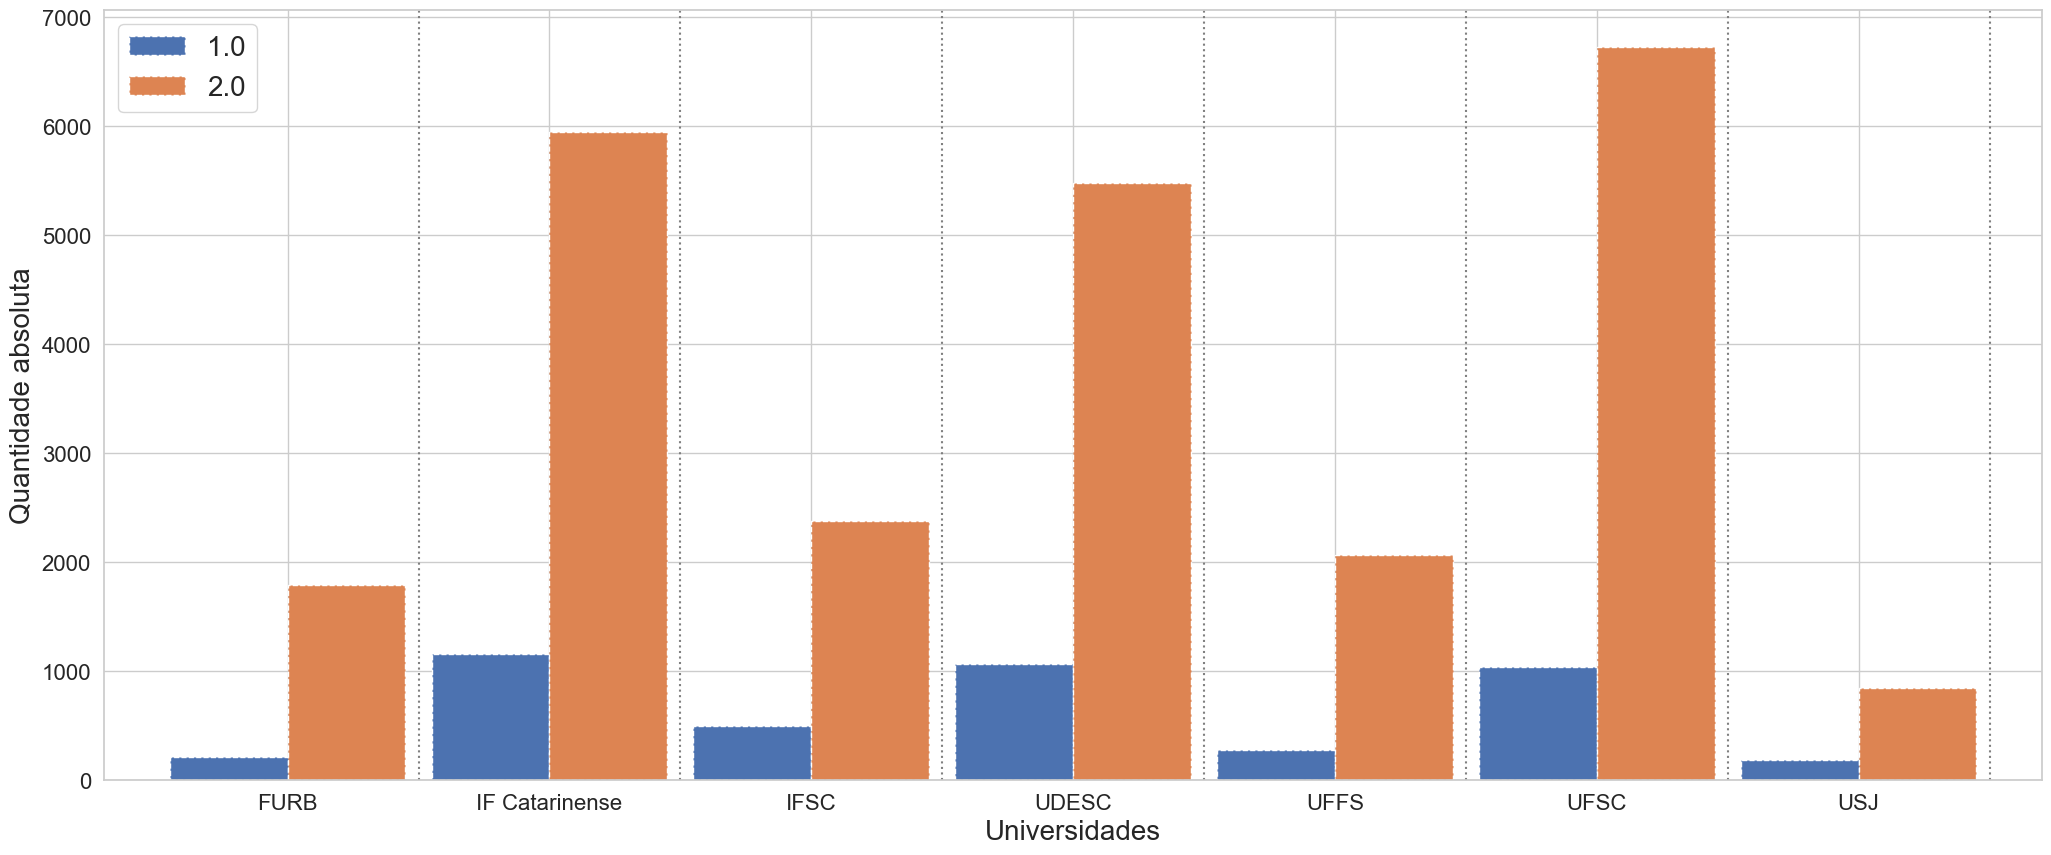

In [70]:
bar_plot_lines(df, 'SG_IES', 'TP_SEXO', 'Quantidade absoluta', 'Universidades')

como é calculada a média: pega o número de mulheres de 2019 da UFSC e divide pela soma de mulheres da UFSC de 2015 a 2019

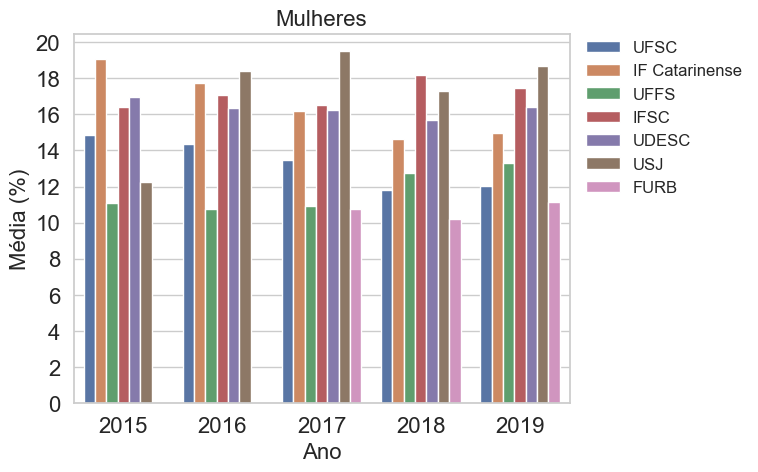

<Figure size 3000x2000 with 0 Axes>

In [11]:
sns.set_theme()
sns.set_style('whitegrid')
df_universidades_sexo = df_universidades.loc[df_universidades.categoria == 'TP_SEXO']
ax = sns.barplot(
    data=df_universidades_sexo.loc[df_universidades_sexo.valor == 1],
    y="media", hue="universidade", x='ano'
)
plt.figure(figsize=(30, 20))
ax.set_title('Mulheres', fontsize=16)
# ax.legend(frameon=False, prop={'size':12})
ax.set_ylabel('Média (%)', fontsize=16)
ax.set_xlabel('Ano', fontsize=16)
ax.set_yticks([x for x in range(0, 21, 2)])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,frameon=False,prop={'size':12})
# sns.barplot(
#     data=df_universidades_sexo.loc[df_universidades_sexo.valor == 2],
#     y="media", hue="universidade", x='ano', ax=ax[1]
# )
# ax[1].set_ylabel('')
# ax[1].set_xlabel('Ano', fontsize=16)
# ax[1].set_title('Homens', fontsize=16)
# ax[1].set_yticks([x for x in range(0, 101, 5)])
# ax[1].legend([],[], frameon=False)
# ax[1].tick_params(axis='both', which='major', labelsize=16)

In [12]:
df_universidades_sexo

universidade   ano categoria valor  qt_abs      media
0              UFSC  2015   TP_SEXO     1     238  14.875000
1              UFSC  2015   TP_SEXO     2    1362  85.125000
17             UFSC  2016   TP_SEXO     1     233  14.382716
18             UFSC  2016   TP_SEXO     2    1387  85.617284
34             UFSC  2017   TP_SEXO     1     210  13.470173
35             UFSC  2017   TP_SEXO     2    1349  86.529827
51             UFSC  2018   TP_SEXO     1     180  11.811024
52             UFSC  2018   TP_SEXO     2    1344  88.188976
68             UFSC  2019   TP_SEXO     1     176  12.030075
69             UFSC  2019   TP_SEXO     2    1287  87.969925
85   IF Catarinense  2015   TP_SEXO     1     219  19.060052
86   IF Catarinense  2015   TP_SEXO     2     930  80.939948
102  IF Catarinense  2016   TP_SEXO     1     233  17.745621
103  IF Catarinense  2016   TP_SEXO     2    1080  82.254379
119  IF Catarinense  2017   TP_SEXO     1     229  16.160903
120  IF Catarinense  2017   TP_SEXO     2    1188  83.839097
136  IF Catarinense  2018   TP_SEXO     1     223  14.622951
137  IF Catarinense  2018   TP_SEXO     2    1302  85.377049
153  IF Catarinense  2019   TP_SEXO     1     254  14.941176
154  IF Catarinense  2019   TP_SEXO     2    1446  85.058824
170            UFFS  2015   TP_SEXO     1      48  11.085450
171            UFFS  2015   TP_SEXO     2     385  88.914550
187            UFFS  2016   TP_SEXO     1      51  10.736842
188            UFFS  2016   TP_SEXO     2     424  89.263158
204            UFFS  2017   TP_SEXO     1      50  10.940919
205            UFFS  2017   TP_SEXO     2     407  89.059081
221            UFFS  2018   TP_SEXO     1      61  12.734864
222            UFFS  2018   TP_SEXO     2     418  87.265136
238            UFFS  2019   TP_SEXO     1      67  13.293651
239            UFFS  2019   TP_SEXO     2     437  86.706349
255            IFSC  2015   TP_SEXO     1      33  16.417910
256            IFSC  2015   TP_SEXO     2     168  83.582090
272            IFSC  2016   TP_SEXO     1      60  17.045455
273            IFSC  2016   TP_SEXO     2     292  82.954545
289            IFSC  2017   TP_SEXO     1      94  16.491228
290            IFSC  2017   TP_SEXO     2     476  83.508772
306            IFSC  2018   TP_SEXO     1     151  18.170878
307            IFSC  2018   TP_SEXO     2     680  81.829122
323            IFSC  2019   TP_SEXO     1     162  17.438105
324            IFSC  2019   TP_SEXO     2     767  82.561895
340           UDESC  2015   TP_SEXO     1     220  16.936105
341           UDESC  2015   TP_SEXO     2    1079  83.063895
357           UDESC  2016   TP_SEXO     1     211  16.331269
358           UDESC  2016   TP_SEXO     2    1081  83.668731
374           UDESC  2017   TP_SEXO     1     212  16.257669
375           UDESC  2017   TP_SEXO     2    1092  83.742331
391           UDESC  2018   TP_SEXO     1     208  15.686275
392           UDESC  2018   TP_SEXO     2    1118  84.313725
408           UDESC  2019   TP_SEXO     1     217  16.389728
409           UDESC  2019   TP_SEXO     2    1107  83.610272
425             USJ  2015   TP_SEXO     1      13  12.264151
426             USJ  2015   TP_SEXO     2      93  87.735849
442             USJ  2016   TP_SEXO     1      35  18.421053
443             USJ  2016   TP_SEXO     2     155  81.578947
459             USJ  2017   TP_SEXO     1      46  19.491525
460             USJ  2017   TP_SEXO     2     190  80.508475
476             USJ  2018   TP_SEXO     1      41  17.299578
477             USJ  2018   TP_SEXO     2     196  82.700422
493             USJ  2019   TP_SEXO     1      48  18.677043
494             USJ  2019   TP_SEXO     2     209  81.322957
510            FURB  2015   TP_SEXO     1       0   0.000000
511            FURB  2015   TP_SEXO     2       0   0.000000
527            FURB  2016   TP_SEXO     1       0   0.000000
528            FURB  2016   TP_SEXO     2       0   0.000000
544            FURB  2017   TP_SEXO     1 

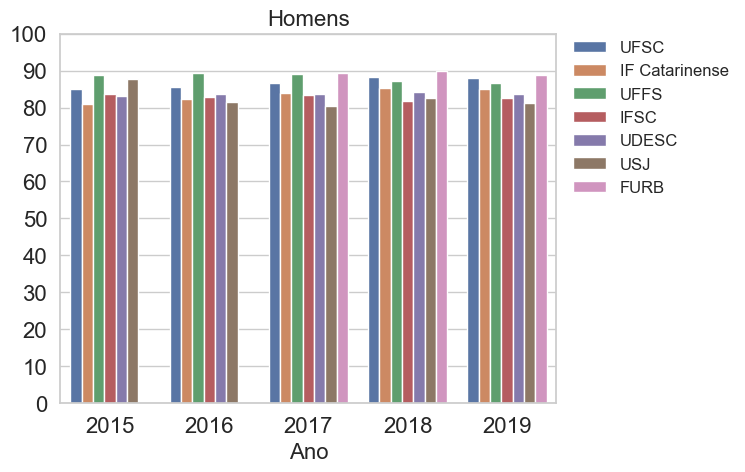

<Figure size 2000x3000 with 0 Axes>

In [314]:
sns.set_theme()
sns.set_style('whitegrid')
ax = sns.barplot(
    data=df_universidades_sexo.loc[df_universidades_sexo.valor == 2],
    y="media", hue="universidade", x='ano'
)

sns.set(font_scale = 1)
plt.figure(figsize=(20, 30))
ax.set_ylabel('')
ax.set_xlabel('Ano', fontsize=16)
ax.set_title('Homens', fontsize=16)
ax.set_yticks([x for x in range(0, 101, 10)])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,frameon=False,prop={'size':12})
# ax.legend([],[], frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)

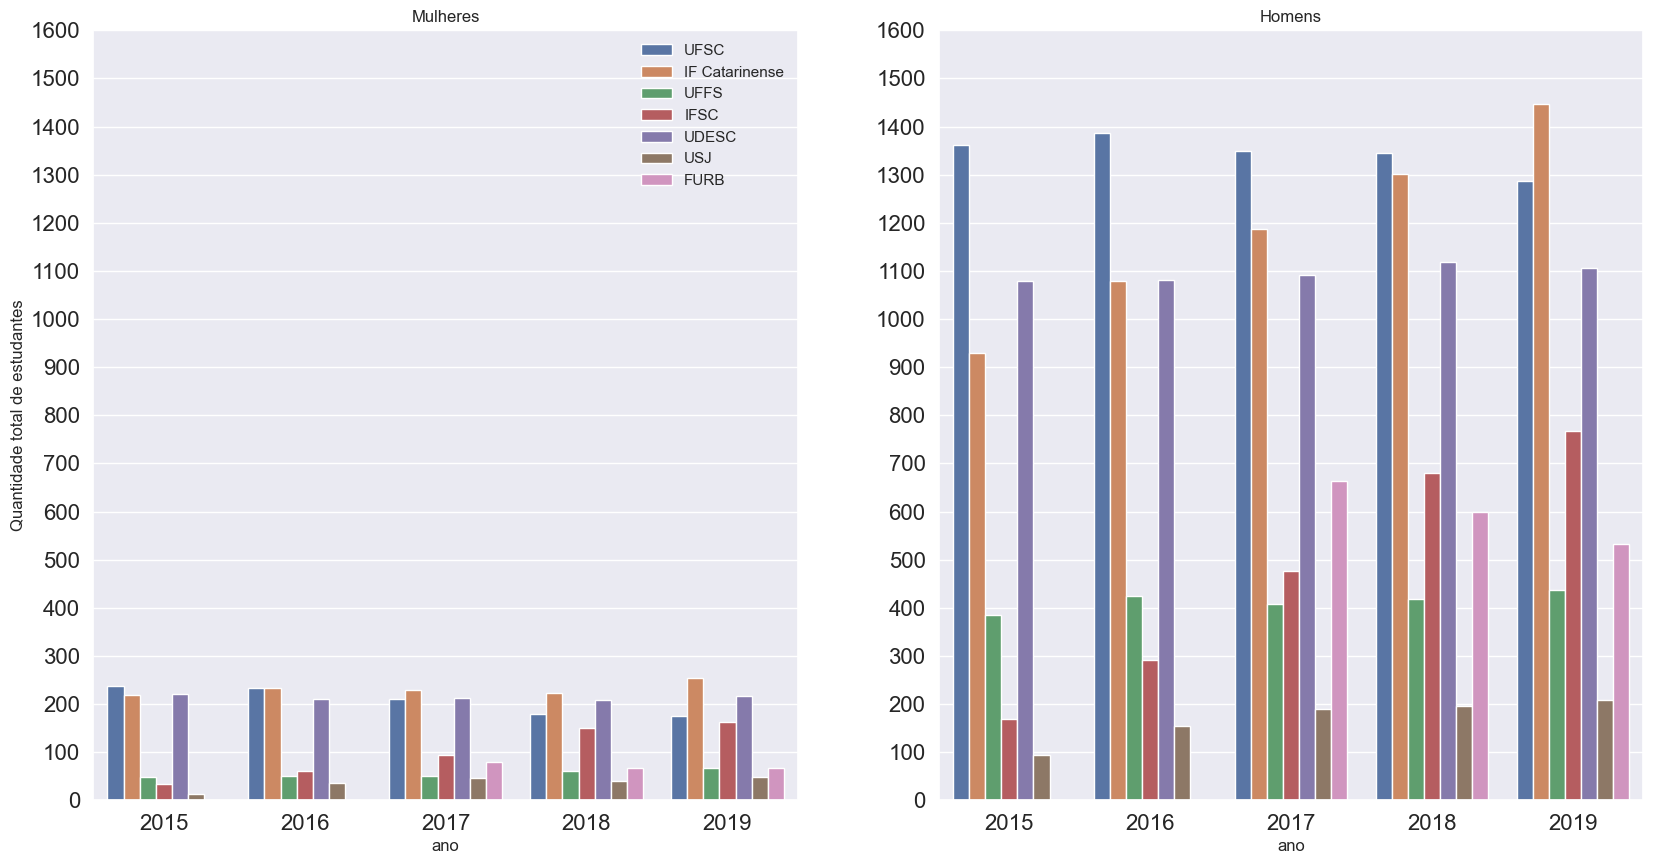

In [315]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(
    data=df_universidades_sexo.loc[df_universidades_sexo.valor == 1],
    y="qt_abs", hue="universidade", x='ano', ax=ax[0]
)
ax[0].set_title('Mulheres')
ax[0].set_yticks([x for x in range(0, 1601, 100)])
ax[0].legend(frameon=False)
ax[0].set_ylabel('Quantidade total de estudantes')
ax[0].tick_params(axis='both', which='major', labelsize=16)

sns.barplot(
    data=df_universidades_sexo.loc[df_universidades_sexo.valor == 2],
    y="qt_abs", hue="universidade", x='ano', ax=ax[1]
)
ax[1].set_ylabel('')
ax[1].set_title('Homens')
ax[1].set_yticks([x for x in range(0, 1601, 100)])
ax[1].legend([],[], frameon=False)
ax[1].tick_params(axis='both', which='major', labelsize=16)

## Gráficos de Forma de Ingresso

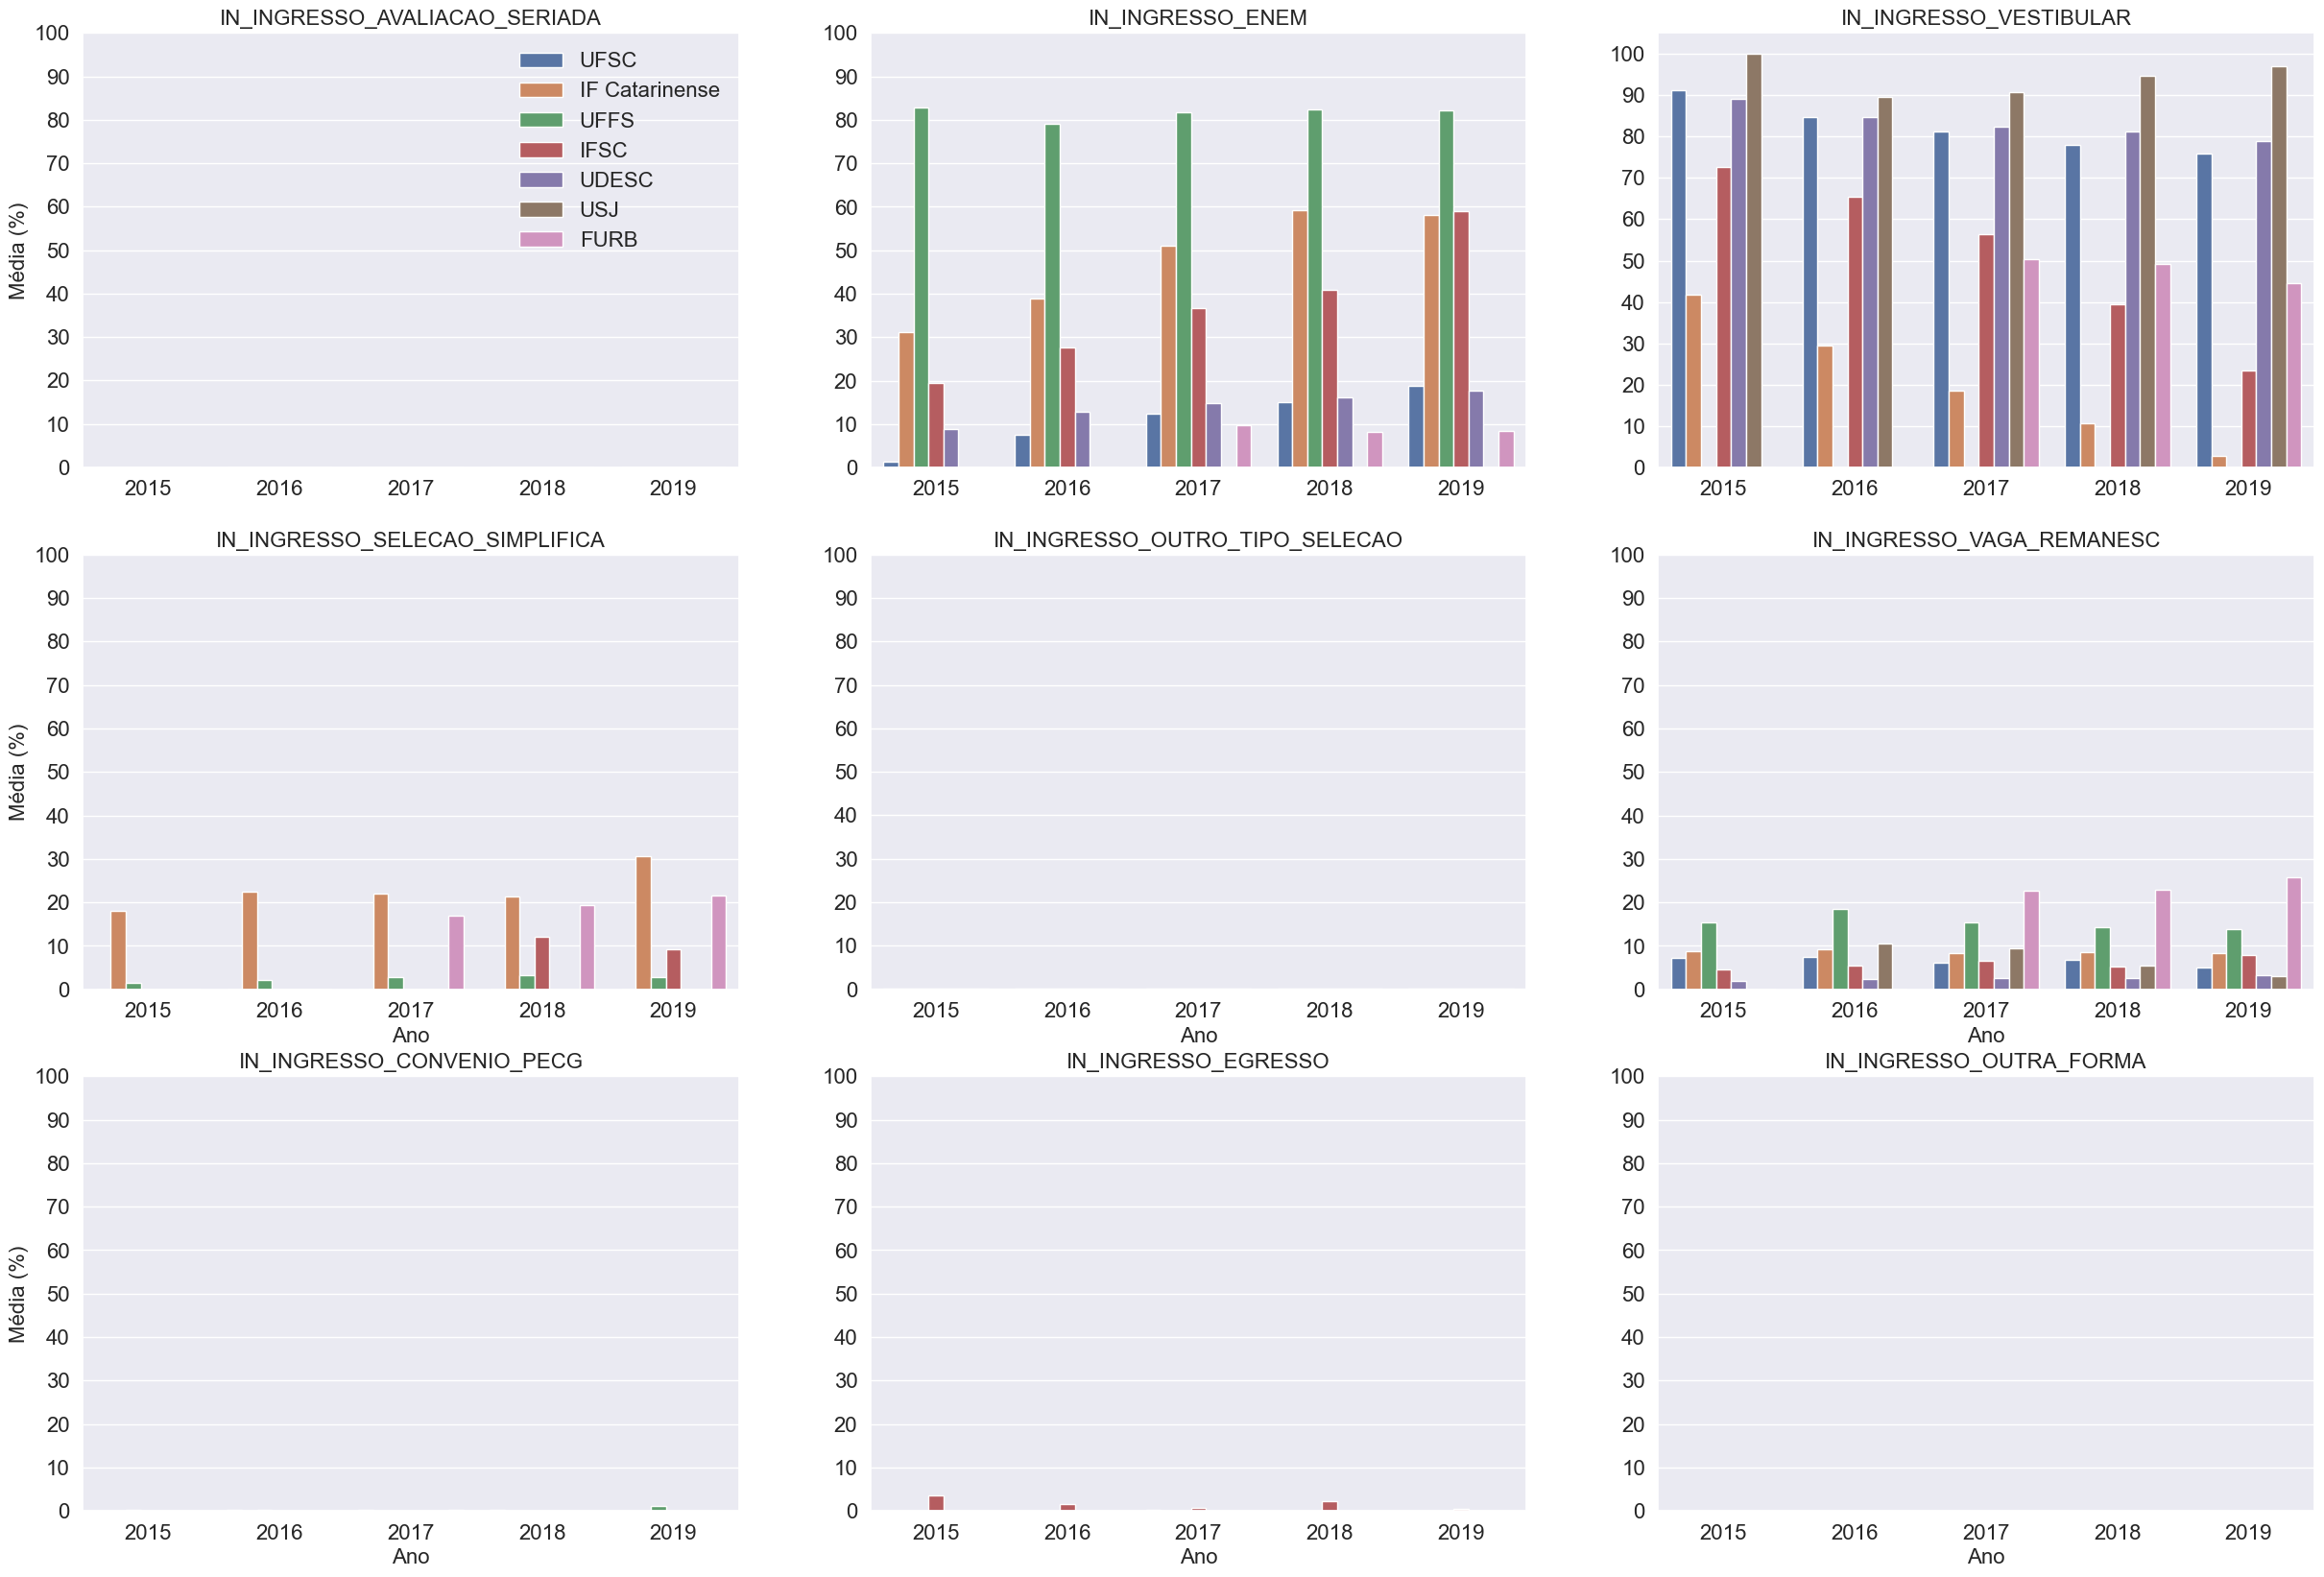

In [199]:
labels = ['IN_INGRESSO_AVALIACAO_SERIADA','IN_INGRESSO_ENEM', 'IN_INGRESSO_VESTIBULAR', 
   'IN_INGRESSO_SELECAO_SIMPLIFICA', 'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
   'IN_INGRESSO_VAGA_PROG_ESPECIAL', 'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL',
   'IN_INGRESSO_CONVENIO_PECG', 'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']
ingresso = df_forma_ingresso.loc[df_forma_ingresso.categoria == 'forma_ingresso']
# gera_graficos(ingresso, labels, 'media', 'Média (%)', [x for x in range(0, 101, 10)])

fig, ax = plt.subplots(3, 3, figsize=(30, 20))
for i in range(len(labels)):
   if i < 3:
      count_row = 0
   elif i >=3 and i < 6:
         count_row = 1
   else: 
      count_row = 2
   sns.barplot(
      data=ingresso.loc[ingresso.valor == labels[i]],
      y='media', hue="universidade", x='ano', ax=ax[count_row][i%3]
   )
   ax[count_row][i%3].set_title(labels[i], fontsize=16)
   # if ticks != False:
   ax[count_row][i%3].set_yticks([x for x in range(0, 101, 10)], fontsize=16)
   # else:
   #     ax[count_row][i%3].set_yticks(fontsize=16)
   ax[count_row][i%3].tick_params(axis='both', which='major', labelsize=16)
   ax[count_row][i%3].set_xlabel('Ano', fontsize=16)
   if i != 0:
      ax[count_row][i%3].legend([],[],frameon=False)
   elif i == 0:
      ax[count_row][i%3].legend(frameon=False, prop={'size': 16})
   if i%3 == 0:
      ax[count_row][i%3].set_ylabel('Média (%)', fontsize=16)
   elif i%3 != 0:
      ax[count_row][i%3].set_ylabel('')
   if i in [0,1,2]:
      ax[count_row][i%3].set_xlabel('')



## Gráficos de Reserva de vagas

universidade   ano      categoria                      valor  qt_abs  \
0              UFSC  2015  reserva_vagas          IN_RESERVA_ETNICO      85   
1              UFSC  2015  reserva_vagas     IN_RESERVA_DEFICIENCIA       0   
2              UFSC  2015  reserva_vagas  IN_RESERVA_ENSINO_PUBLICO     325   
3              UFSC  2015  reserva_vagas  IN_RESERVA_RENDA_FAMILIAR       0   
4              UFSC  2015  reserva_vagas           IN_RESERVA_OUTRA       0   
5              UFSC  2016  reserva_vagas          IN_RESERVA_ETNICO      64   
6              UFSC  2016  reserva_vagas     IN_RESERVA_DEFICIENCIA       0   
7              UFSC  2016  reserva_vagas  IN_RESERVA_ENSINO_PUBLICO     396   
8              UFSC  2016  reserva_vagas  IN_RESERVA_RENDA_FAMILIAR       0   
9              UFSC  2016  reserva_vagas           IN_RESERVA_OUTRA       0   
10             UFSC  2017  reserva_vagas          IN_RESERVA_ETNICO      47   
11             UFSC  2017  reserva_vagas     IN_RESERVA_DEFICIENCIA       0   
12             UFSC  2017  reserva_vagas  IN_RESERVA_ENSINO_PUBLICO     460   
13             UFSC  2017  reserva_vagas  IN_RESERVA_RENDA_FAMILIAR       0   
14             UFSC  2017  reserva_vagas           IN_RESERVA_OUTRA       0   
15             UFSC  2018  reserva_vagas          IN_RESERVA_ETNICO      38   
16             UFSC  2018  reserva_vagas     IN_RESERVA_DEFICIENCIA       0   
17             UFSC  2018  reserva_vagas  IN_RESERVA_ENSINO_PUBLICO     470   
18             UFSC  2018  reserva_vagas  IN_RESERVA_RENDA_FAMILIAR       0   
19             UFSC  2018  reserva_vagas           IN_RESERVA_OUTRA       0   
20             UFSC  2019  reserva_vagas          IN_RESERVA_ETNICO      24   
21             UFSC  2019  reserva_vagas     IN_RESERVA_DEFICIENCIA       0   
22             UFSC  2019  reserva_vagas  IN_RESERVA_ENSINO_PUBLICO     488   
23             UFSC  2019  reserva_vagas  IN_RESERVA_RENDA_FAMILIAR       0   
24             UFSC  2019  reserva_vagas           IN_RESERVA_OUTRA       0   
25   IF Catarinense  2015  reserva_vagas          IN_RESERVA_ETNICO      25   
26   IF Catarinense  2015  reserva_vagas     IN_RESERVA_DEFICIENCIA       0   
27   IF Catarinense  2015  reserva_vagas  IN_RESERVA_ENSINO_PUBLICO     257   
28   IF Catarinense  2015  reserva_vagas  IN_RESERVA_RENDA_FAMILIAR      78   
29   IF Catarinense  2015  reserva_vagas           IN_RESERVA_OUTRA       0   
30   IF Catarinense  2016  reserva_vagas          IN_RESERVA_ETNICO      32   
31   IF Catarinense  2016  reserva_vagas     IN_RESERVA_DEFICIENCIA       0   
32   IF Catarinense  2016  reserva_vagas  IN_RESERVA_ENSINO_PUBLICO     313   
33   IF Catarinense  2016  reserva_vagas  IN_RESERVA_RENDA_FAMILIAR      98   
34   IF Catarinense  2016  reserva_vagas           IN_RESERVA_OUTRA       0   
35   IF Catarinense  2017  reserva_vagas          IN_RESERVA_ETNICO      42   
36   IF Catarinense  2017  reserva_vagas     IN_RESERVA_DEFICIENCIA       0   
37   IF Catarinense  2017  reserva_vagas  IN_RESERVA_ENSINO_PUBLICO     333   
38   IF Catarinense  2017  reserva_vagas  IN_RESERVA_RENDA_FAMILIAR     115   
39   IF Catarinense  2017  reserva_vagas           IN_RESERVA_OUTRA       0   
40   IF Catarinense  2018  reserva_vagas          IN_RESERVA_ETNICO      52   
41   IF Catarinense  2018  reserva_vagas     IN_RESERVA_DEFICIENCIA       1   
42   IF Catarinense  2018  reserva_vagas  IN_RESERVA_ENSINO_PUBLICO     357   
43   IF Catarinense  2018  reserva_vagas  IN_RESERVA_RENDA_FAMILIAR     128   
44   IF Catarinense  2018  reserva_vagas           IN_RESERVA_OUTRA       0   
45   IF Catarinense  2019  reserva_vagas          IN_RESERVA_ETNICO      17   
46   IF Catarinense  2019  reserva_vagas     IN_RESERVA_DEFICIENCIA       2   
47   IF Catarinense  2019  reserva_vagas  IN_RESERVA_ENSINO_PUBLICO      91   
48   IF Catarinense  2019  reserva_vagas  IN_RESERVA_RENDA_FAMILIAR      38   
49   IF Catarinense  2019  reserva_vagas           IN_RES

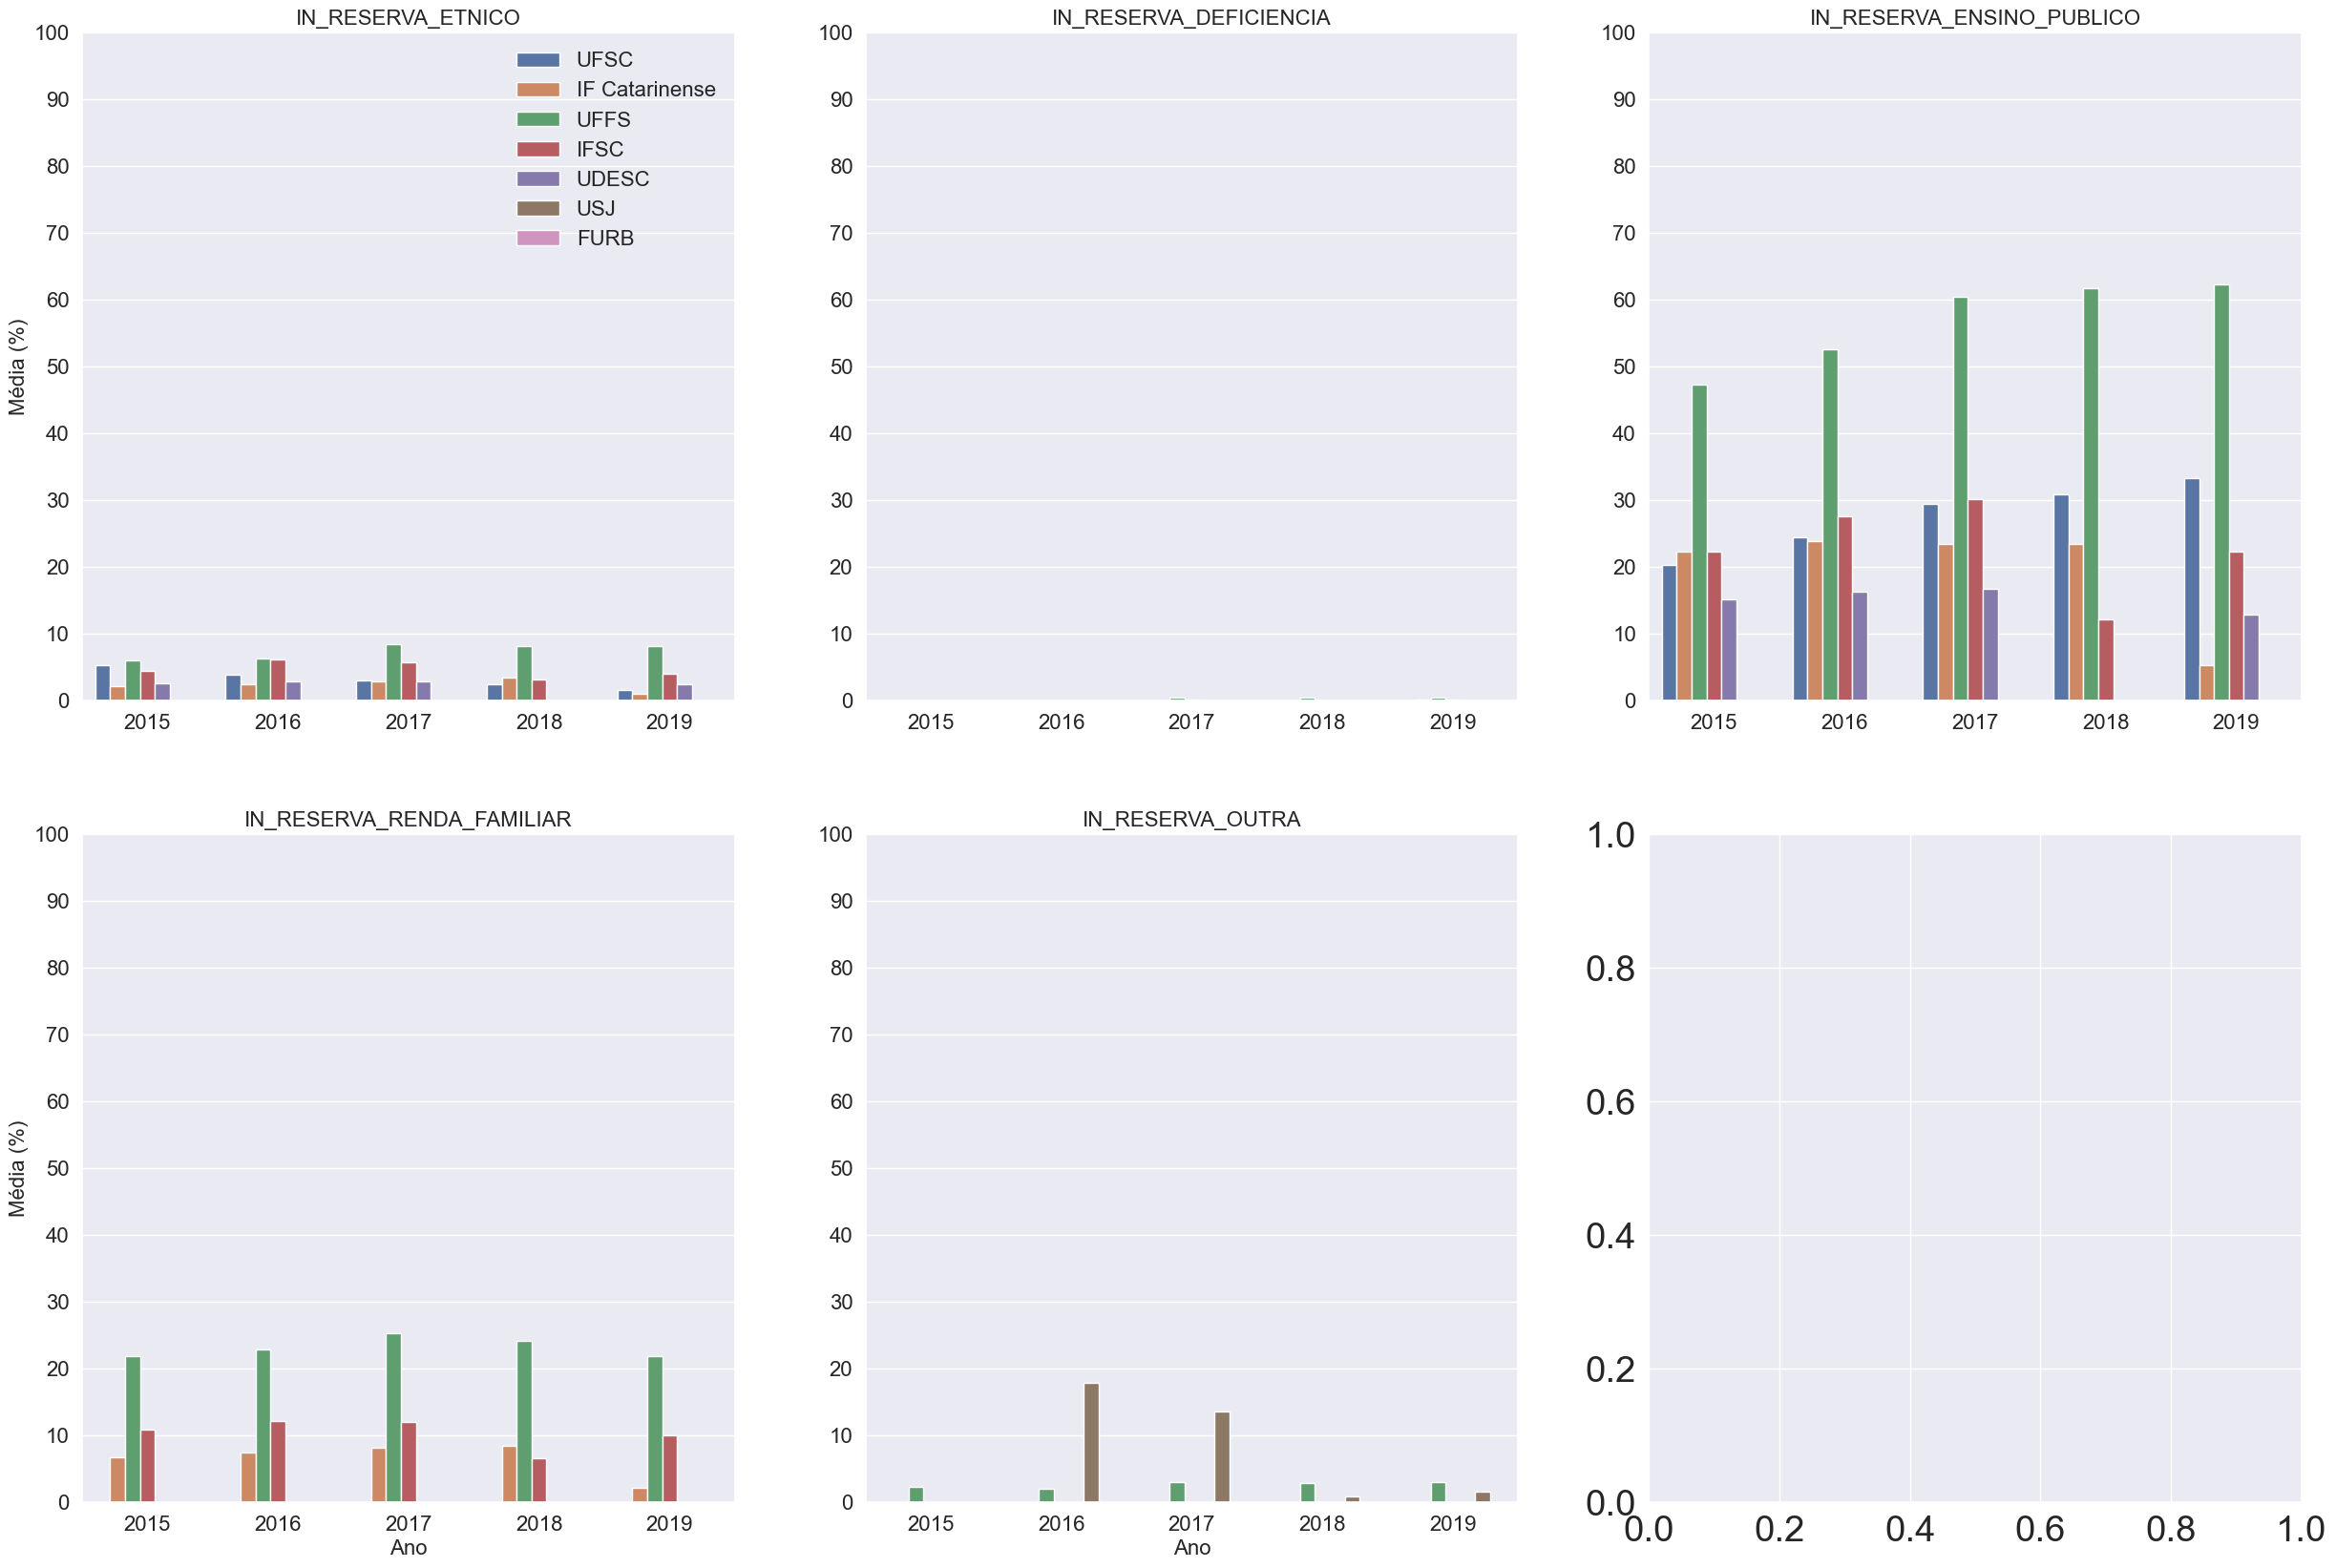

In [123]:
labels = ['IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 
 'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
 'IN_RESERVA_OUTRA']
reserva = df_reserva_vagas.loc[df_reserva_vagas.categoria == 'reserva_vagas']
# gera_graficos(reserva, labels, 'media', 'Média (%)', [x for x in range(0, 101, 10)])


fig, ax = plt.subplots(2, 3, figsize=(30, 20))
for i in range(len(labels)):
   if i < 3:
      count_row = 0
   elif i >=3 and i < 6:
         count_row = 1
   else: 
      count_row = 2
   sns.barplot(
      data=reserva.loc[reserva.valor == labels[i]],
      y='media', hue="universidade", x='ano', ax=ax[count_row][i%3]
   )
   ax[count_row][i%3].set_title(labels[i], fontsize=16)
   # if ticks != False:
   ax[count_row][i%3].set_yticks([x for x in range(0, 101, 10)], fontsize=16)
   # else:
   #     ax[count_row][i%3].set_yticks(fontsize=16)
   ax[count_row][i%3].tick_params(axis='both', which='major', labelsize=16)
   ax[count_row][i%3].set_xlabel('Ano', fontsize=16)
   if i != 0:
      ax[count_row][i%3].legend([],[],frameon=False)
   elif i == 0:
      ax[count_row][i%3].legend(frameon=False, prop={'size': 16})
   if i%3 == 0:
      ax[count_row][i%3].set_ylabel('Média (%)', fontsize=16)
   elif i%3 != 0:
      ax[count_row][i%3].set_ylabel('')
   if i in [0,1,2]:
      ax[count_row][i%3].set_xlabel('')


display(reserva)

## Gráficos de Deficiências

Text(0.5, 0, 'Ano')

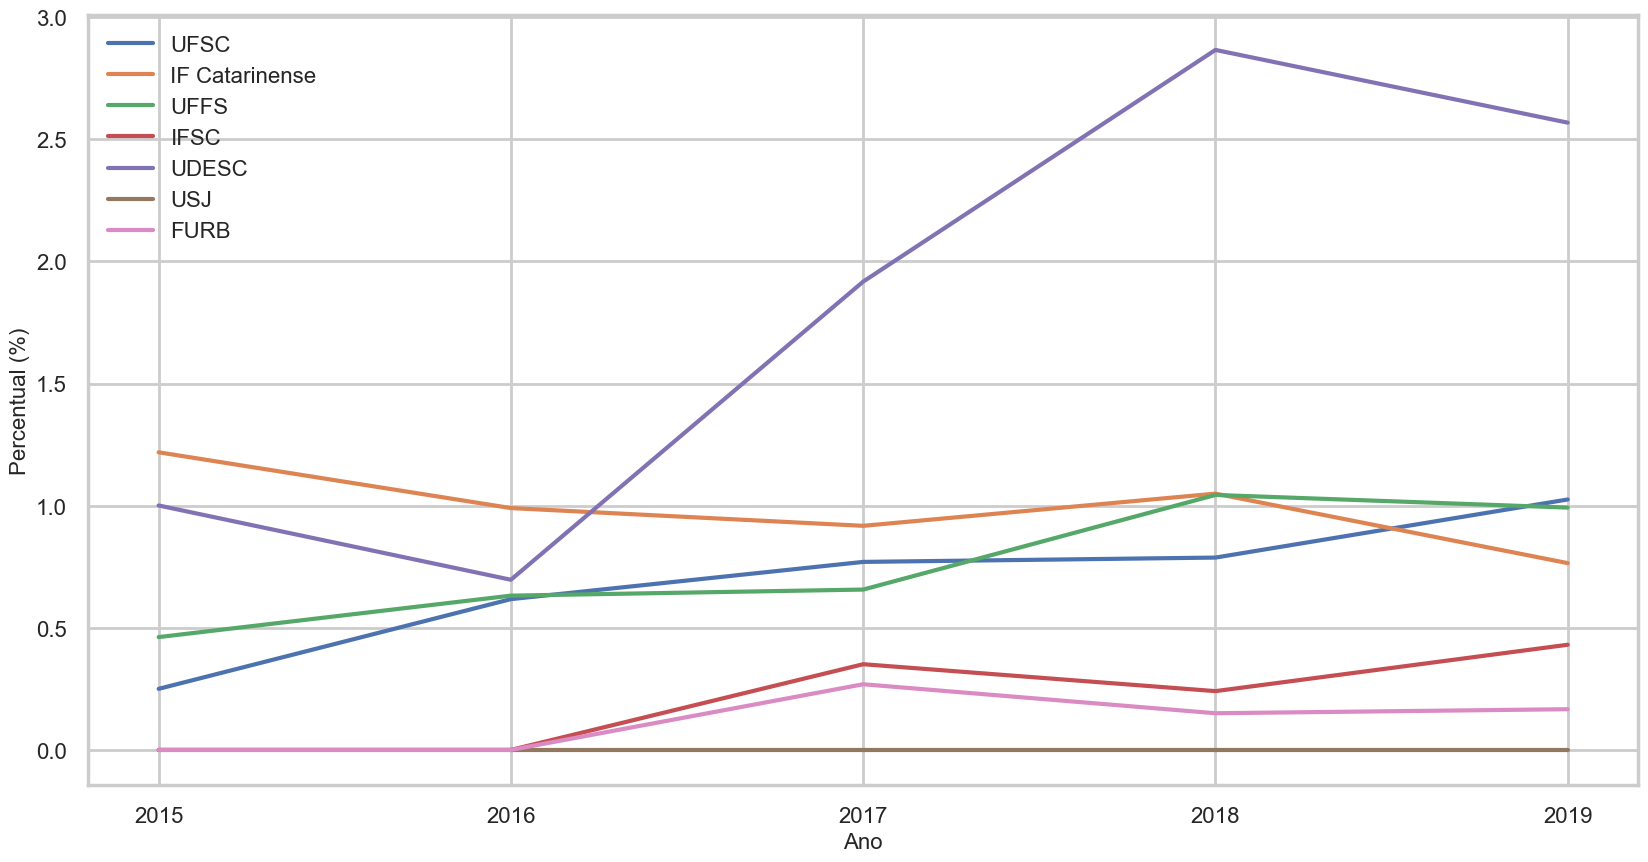

In [68]:
# fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df_universidades_def = df_universidades.loc[df_universidades.categoria == 'IN_DEFICIENCIA']
sns.set(rc={"figure.figsize":(20, 10)})
sns.set_theme('poster')
sns.set_style('whitegrid')
ax = sns.lineplot(
    data=df_universidades_def.loc[df_universidades_def.valor == 1],
    y="media", hue="universidade", x='ano'
)
ax.set_title('', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticks([x for x in range(2015, 2020)], fontsize=16)
ax.legend(frameon=False, prop={'size': 16})
ax.set_ylabel('Percentual (%)', fontsize=16)
ax.set_xlabel('Ano', fontsize=16)
# sns.barplot(
#     data=df_universidades_def.loc[df_universidades_def.valor == 0],
#     y="media", hue="universidade", x='ano', ax=ax[1]
# )
# ax[1].set_ylabel('')
# ax[1].set_yticks([x for x in range(0, 106, 5)])
# ax[1].tick_params(axis='both', which='major', labelsize=16)
# ax[1].set_title('Sem deficiência', fontsize=16)
# ax[1].legend([],[], frameon=False)
# ax[1].set_xlabel('Ano', fontsize=16)

Text(0.5, 0, 'Ano')

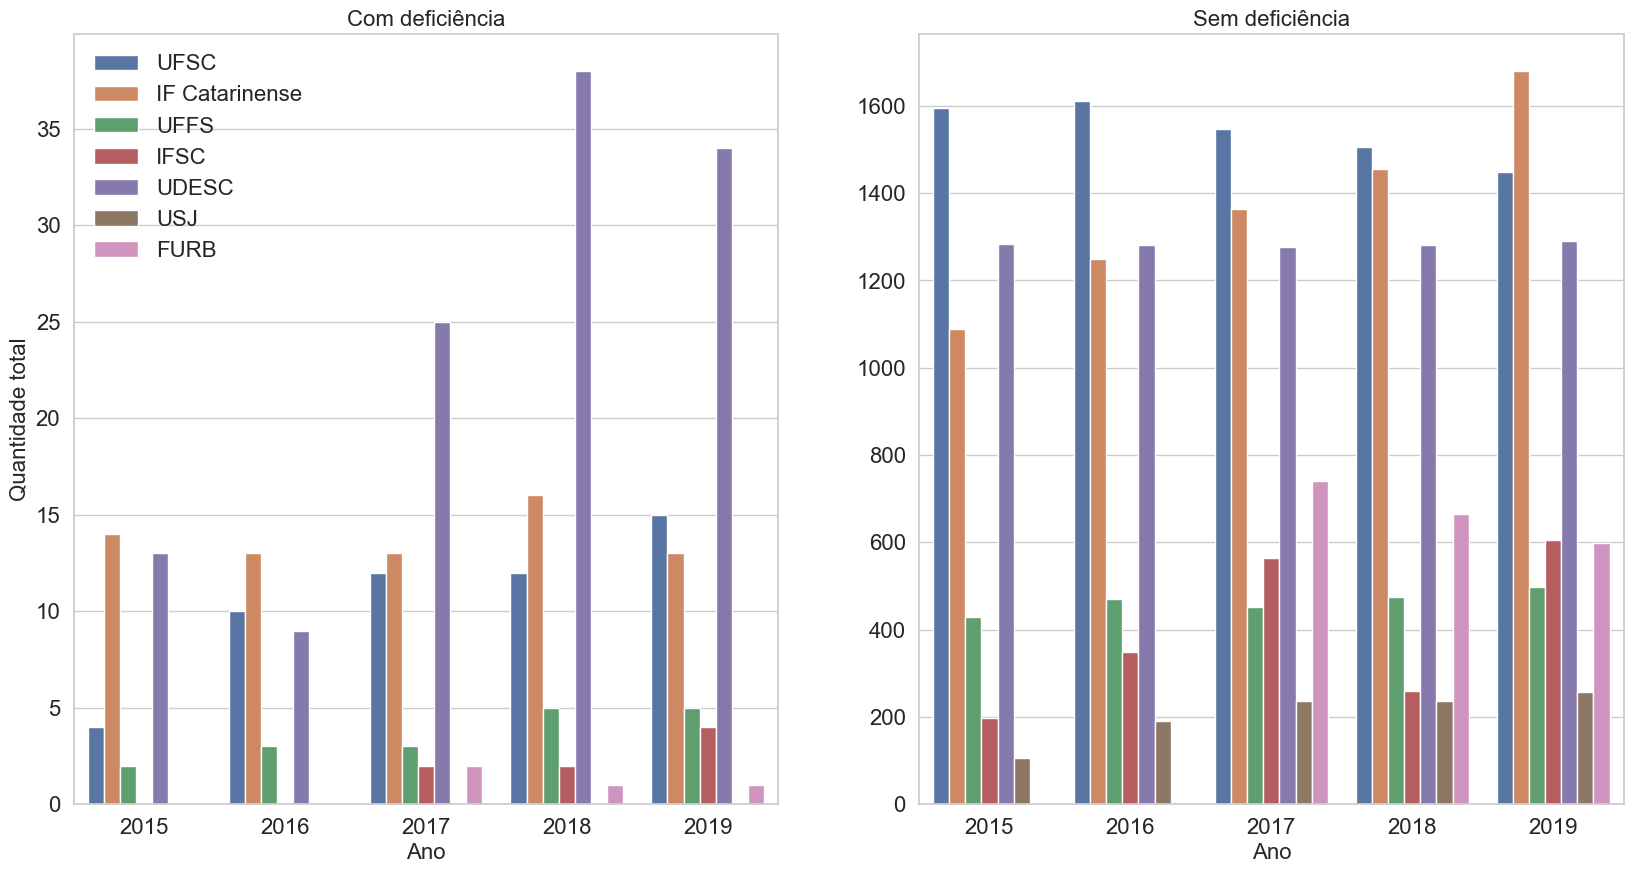

In [134]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
df_universidades_def = df_universidades.loc[df_universidades.categoria == 'IN_DEFICIENCIA']
sns.barplot(
    data=df_universidades_def.loc[df_universidades_def.valor == 1],
    y="qt_abs", hue="universidade", x='ano', ax=ax[0]
)
ax[0].set_title('Com deficiência', fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=16)
# ax[0].set_yticks([x for x in range(0, 51, 5)])
ax[0].legend(frameon=False, prop={'size': 16})
ax[0].set_ylabel('Quantidade total', fontsize=16)
ax[0].set_xlabel('Ano', fontsize=16)

sns.barplot(
    data=df_universidades_def.loc[df_universidades_def.valor == 0],
    y="qt_abs", hue="universidade", x='ano', ax=ax[1]
)
ax[1].set_ylabel('')
ax[1].tick_params(axis='both', which='major', labelsize=16)
# ax[1].set_yticks([x for x in range(0, 51, 5)])
ax[1].set_title('Sem deficiência', fontsize=16)
ax[1].legend([],[], frameon=False)
ax[1].set_xlabel('Ano', fontsize=16)

#### Descrição das deficiencias - gráficos

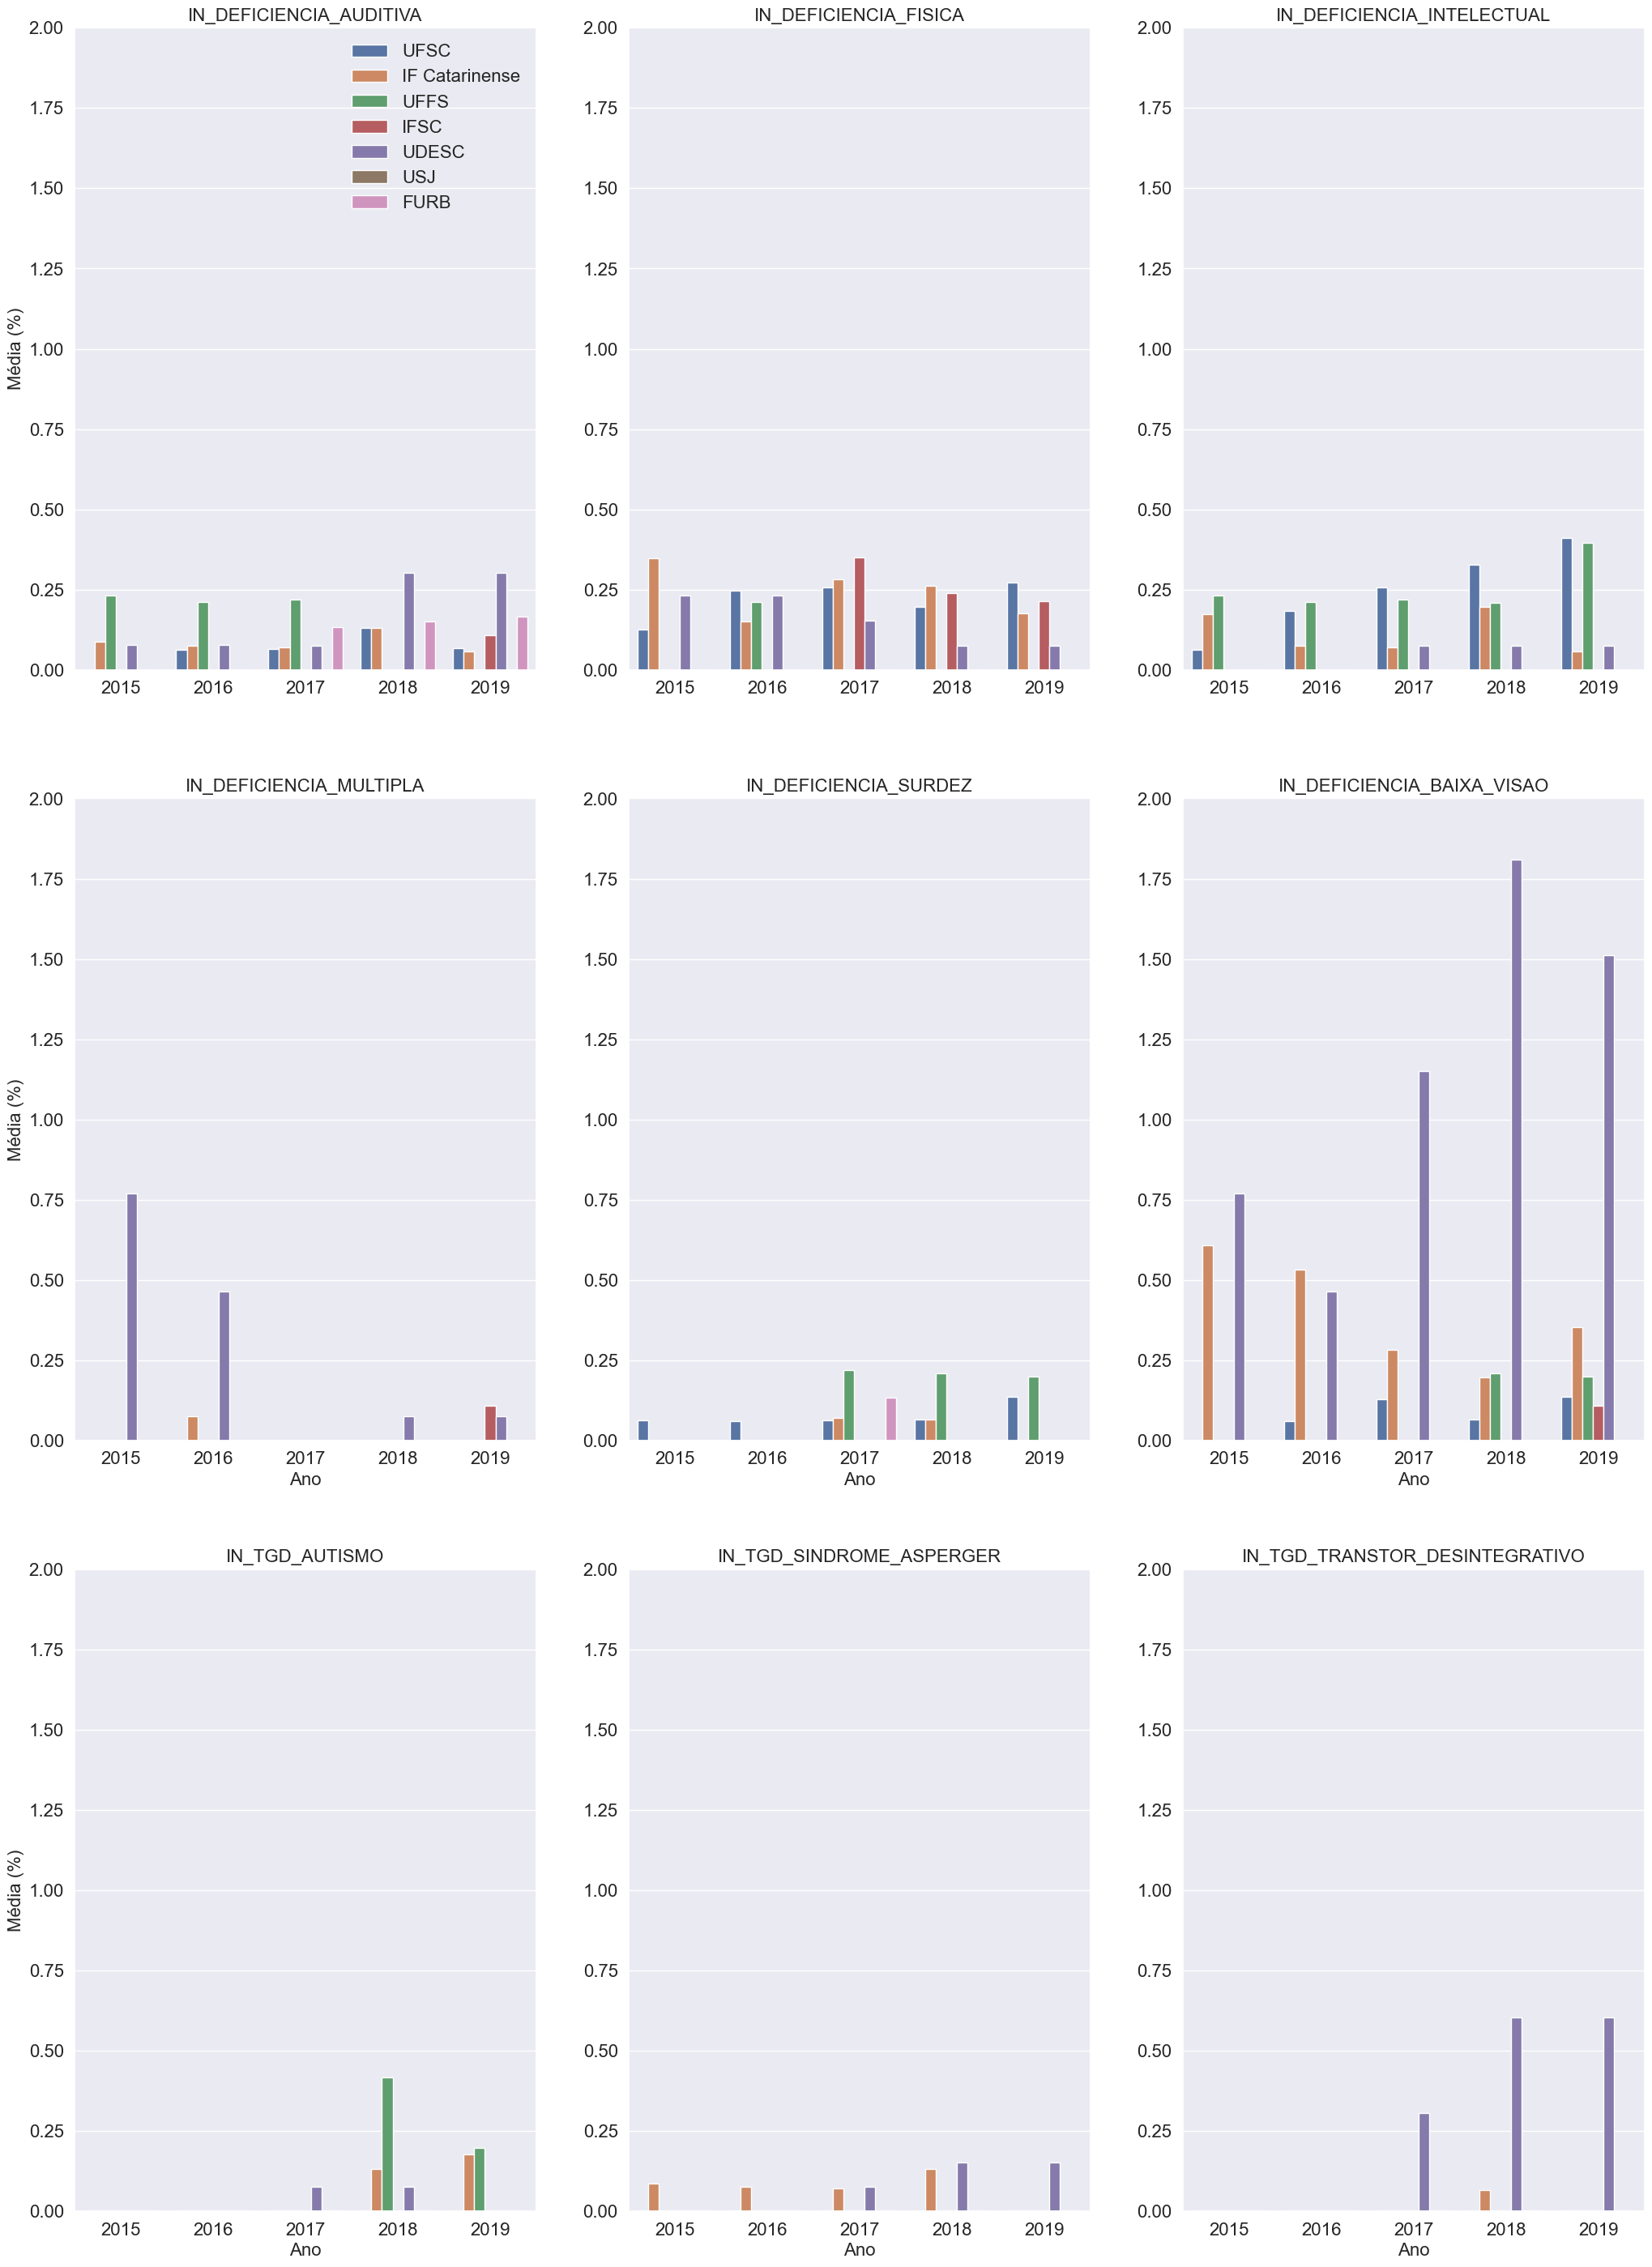

In [173]:
labels = ['IN_DEFICIENCIA_AUDITIVA',
'IN_DEFICIENCIA_FISICA',
'IN_DEFICIENCIA_INTELECTUAL',
'IN_DEFICIENCIA_MULTIPLA',
'IN_DEFICIENCIA_SURDEZ',
'IN_DEFICIENCIA_BAIXA_VISAO',
'IN_TGD_AUTISMO',
'IN_TGD_SINDROME_ASPERGER',
'IN_TGD_TRANSTOR_DESINTEGRATIVO']

dados = df_deficiencia_desc.loc[df_deficiencia_desc.categoria == 'deficiencia_desc']
# gera_graficos(dados, labels, 'media', 'Média (%)', [x for x in range(0, 101, 10)])

# display(dados)

fig, ax = plt.subplots(3, 3, figsize=(25, 35))
for i in range(len(labels)):
   if i < 3:
      count_row = 0
   elif i >=3 and i < 6:
         count_row = 1
   elif i >=6 and i < 9:
         count_row = 2
   elif i >=9 and i < 12:
         count_row = 3
   else: 
      count_row = 4
   sns.barplot(
      data=dados.loc[dados.valor == labels[i]],
      y='media', hue="universidade", x='ano', ax=ax[count_row][i%3]
   )
   ax[count_row][i%3].set_title(labels[i], fontsize=16)
   # if ticks != False:
   ax[count_row][i%3].set_yticks([0, 0.25 ,0.5, 0.75, 1, 1.25, 1.5, 1.75, 2], fontsize=16)
   # else:
   #     ax[count_row][i%3].set_yticks(fontsize=16)
   ax[count_row][i%3].tick_params(axis='both', which='major', labelsize=16)
   ax[count_row][i%3].set_xlabel('Ano', fontsize=16)
   if i != 0:
      ax[count_row][i%3].legend([],[],frameon=False)
   elif i == 0:
      ax[count_row][i%3].legend(frameon=False, prop={'size': 16})
   if i%3 == 0:
      ax[count_row][i%3].set_ylabel('Média (%)', fontsize=16)
   elif i%3 != 0:
      ax[count_row][i%3].set_ylabel('')
   if i in [0,1,2]:
      ax[count_row][i%3].set_xlabel('')

In [196]:
df_universidades_def.valor.unique()

array([1, 2, 0])

In [134]:
def gera_graficos(data:pd.DataFrame, labels, tipo, nome_tipo, ticks = [x for x in range(0, 101, 10)]):
    fig, ax = plt.subplots(2, len(labels)//2, figsize=(20, 10))
    for i in range(len(labels)):
        if i >= (len(labels)//2):
            count_row = 1
        else: 
            count_row = 0
        sns.barplot(
            data=data.loc[data.valor == labels[i]],
            y=tipo, hue="universidade", x='ano', ax=ax[count_row][i%3]
        )
        ax[count_row][i%3].set_title(labels[i], fontsize=16)
        if ticks != False:
            ax[count_row][i%3].set_yticks(ticks, fontsize=16)
        # else:
        #     ax[count_row][i%3].set_yticks(fontsize=16)
        ax[count_row][i%3].tick_params(axis='both', which='major', labelsize=16)
        ax[count_row][i%3].set_xlabel('Ano', fontsize=16)
        if i != 0:
            ax[count_row][i%3].legend([],[],frameon=False)
        elif i == 0:
            ax[count_row][i%3].legend(frameon=False, prop={'size': 16})
        if i%3 == 0:
            ax[count_row][i%3].set_ylabel(nome_tipo, fontsize=16)
        elif i%3 != 0:
            ax[count_row][i%3].set_ylabel('')
        if i in [0,1,2]:
            ax[count_row][i%3].set_xlabel('')

## Gráficos de Cor/Raça

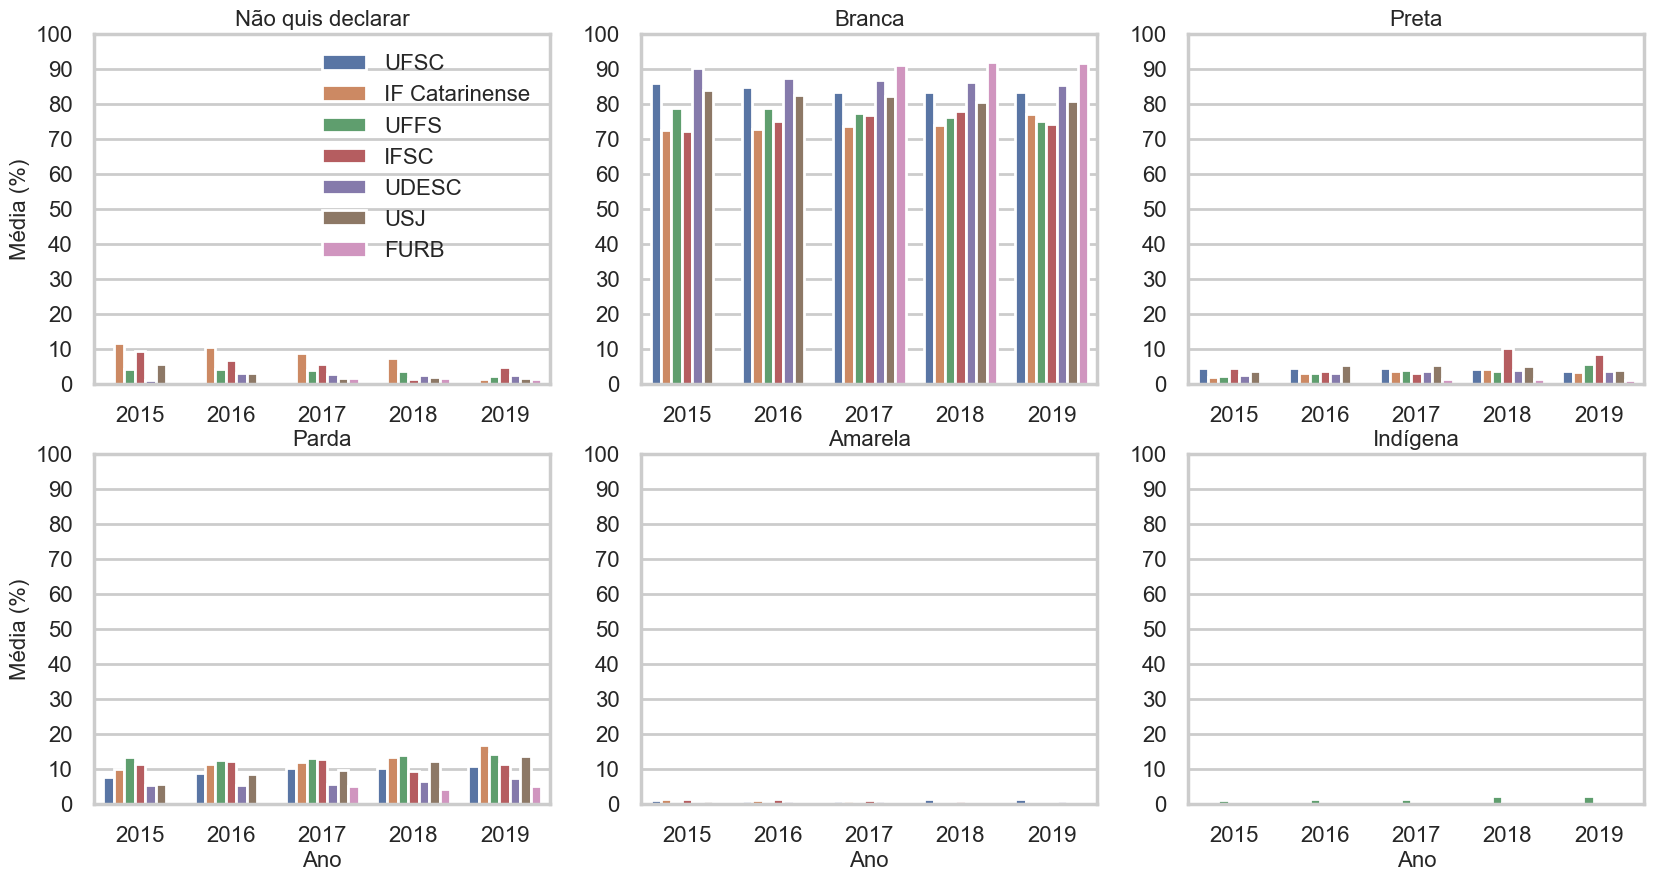

In [111]:
labels = ['Não quis declarar', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
df_universidades_cor = df_universidades.loc[df_universidades.categoria == 'TP_COR_RACA']
gera_graficos(df_universidades_cor, labels, 'media', 'Média (%)', [x for x in range(0, 101, 10)])

# display(df_universidades_cor)

universidade   ano    categoria              valor  qt_abs      media
4           UFSC  2015  TP_COR_RACA  Não quis declarar       8   0.500000
5           UFSC  2015  TP_COR_RACA             Branca    1375  85.937500
6           UFSC  2015  TP_COR_RACA              Preta      74   4.625000
7           UFSC  2015  TP_COR_RACA              Parda     121   7.562500
8           UFSC  2015  TP_COR_RACA            Amarela      18   1.125000
..           ...   ...          ...                ...     ...        ...
584         FURB  2019  TP_COR_RACA              Preta       6   1.000000
585         FURB  2019  TP_COR_RACA              Parda      30   5.000000
586         FURB  2019  TP_COR_RACA            Amarela       4   0.666667
587         FURB  2019  TP_COR_RACA           Indígena       1   0.166667
588         FURB  2019  TP_COR_RACA     Sem informação       0   0.000000

[245 rows x 6 columns]

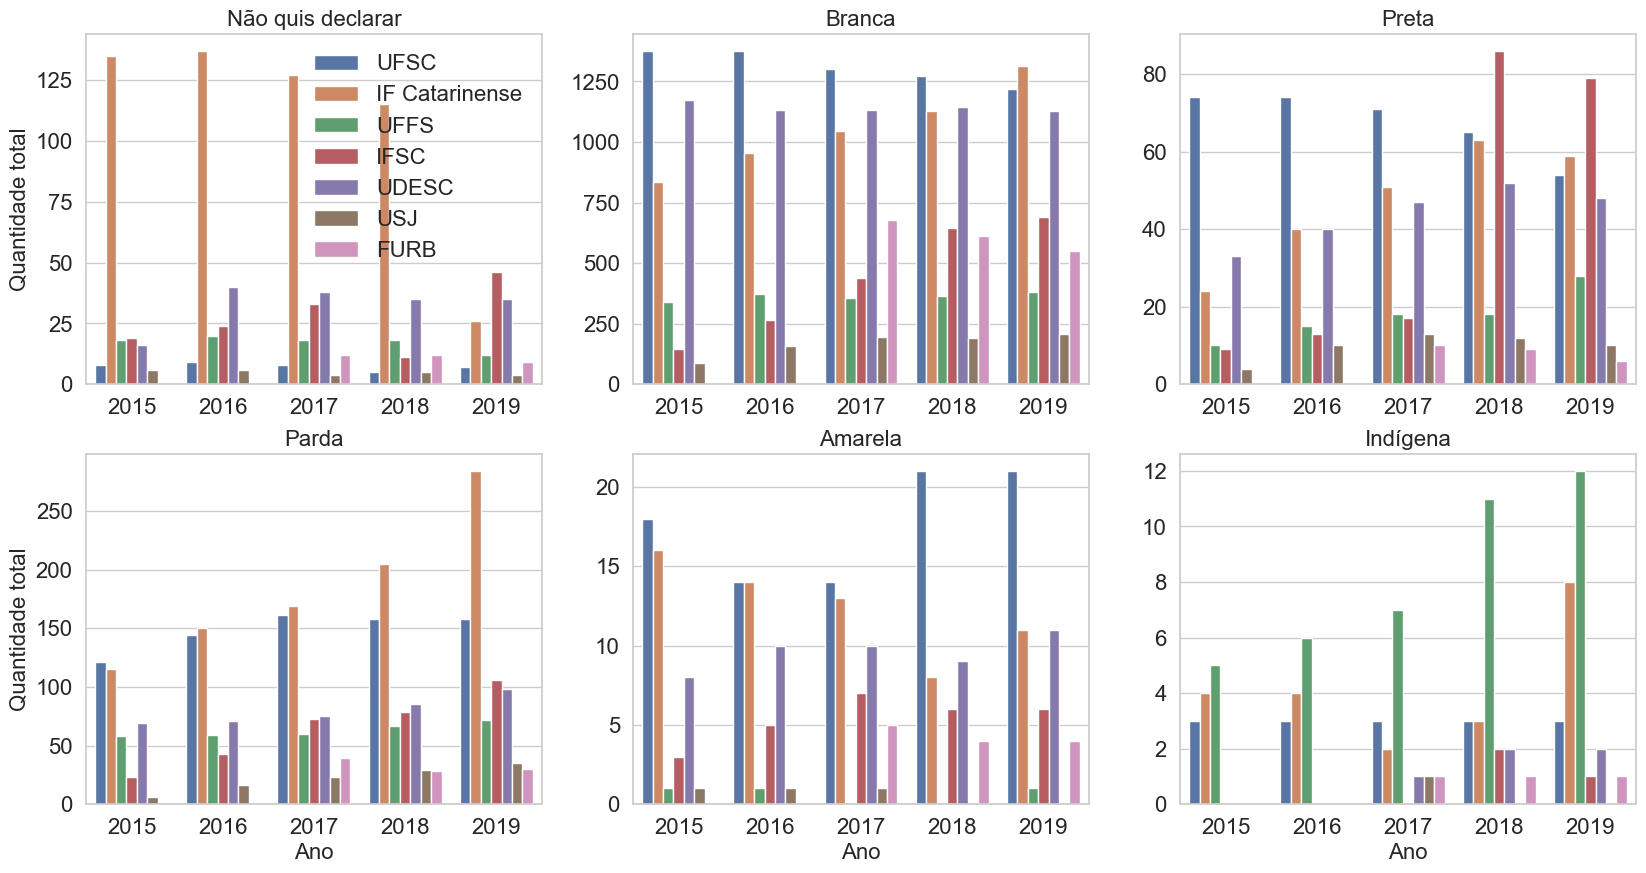

In [156]:
labels = ['Não quis declarar', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
df_universidades_cor = df_universidades.loc[df_universidades.categoria == 'TP_COR_RACA']

gera_graficos(df_universidades_cor, labels, 'qt_abs', 'Quantidade total', False)

display(df_universidades_cor)

## Gráficos de Idade

In [14]:
labels = ['até 18 anos', '18 - 24 anos', '25 - 34 anos', '35 - 44 anos',
       '45 - 59 anos', '60 - 99 anos']
df_universidades_idade = df_universidades.loc[df_universidades.categoria == 'NU_IDADE']

# gera_graficos(df_universidades_idade, labels, 'media', 'Média (%)')

display(df_universidades_idade)

universidade   ano categoria         valor  qt_abs      media
11             UFSC  2015  NU_IDADE   até 18 anos       8   0.500000
12             UFSC  2015  NU_IDADE  18 - 24 anos    1038  64.875000
13             UFSC  2015  NU_IDADE  25 - 34 anos     486  30.375000
14             UFSC  2015  NU_IDADE  35 - 44 anos      52   3.250000
15             UFSC  2015  NU_IDADE  45 - 59 anos      15   0.937500
16             UFSC  2015  NU_IDADE  60 - 99 anos       1   0.062500
28             UFSC  2016  NU_IDADE   até 18 anos       9   0.555556
29             UFSC  2016  NU_IDADE  18 - 24 anos    1017  62.777778
30             UFSC  2016  NU_IDADE  25 - 34 anos     522  32.222222
31             UFSC  2016  NU_IDADE  35 - 44 anos      57   3.518519
32             UFSC  2016  NU_IDADE  45 - 59 anos      15   0.925926
33             UFSC  2016  NU_IDADE  60 - 99 anos       0   0.000000
45             UFSC  2017  NU_IDADE   até 18 anos       4   0.256575
46             UFSC  2017  NU_IDADE  18 - 24 anos     971  62.283515
47             UFSC  2017  NU_IDADE  25 - 34 anos     505  32.392559
48             UFSC  2017  NU_IDADE  35 - 44 anos      65   4.169339
49             UFSC  2017  NU_IDADE  45 - 59 anos      14   0.898012
50             UFSC  2017  NU_IDADE  60 - 99 anos       0   0.000000
62             UFSC  2018  NU_IDADE   até 18 anos       4   0.262467
63             UFSC  2018  NU_IDADE  18 - 24 anos     935  61.351706
64             UFSC  2018  NU_IDADE  25 - 34 anos     506  33.202100
65             UFSC  2018  NU_IDADE  35 - 44 anos      66   4.330709
66             UFSC  2018  NU_IDADE  45 - 59 anos      12   0.787402
67             UFSC  2018  NU_IDADE  60 - 99 anos       1   0.065617
79             UFSC  2019  NU_IDADE   até 18 anos       3   0.205058
80             UFSC  2019  NU_IDADE  18 - 24 anos     905  61.859193
81             UFSC  2019  NU_IDADE  25 - 34 anos     481  32.877649
82             UFSC  2019  NU_IDADE  35 - 44 anos      59   4.032809
83             UFSC  2019  NU_IDADE  45 - 59 anos      13   0.888585
84             UFSC  2019  NU_IDADE  60 - 99 anos       2   0.136705
96   IF Catarinense  2015  NU_IDADE   até 18 anos       4   0.348129
97   IF Catarinense  2015  NU_IDADE  18 - 24 anos     649  56.483899
98   IF Catarinense  2015  NU_IDADE  25 - 34 anos     350  30.461271
99   IF Catarinense  2015  NU_IDADE  35 - 44 anos     111   9.660574
100  IF Catarinense  2015  NU_IDADE  45 - 59 anos      29   2.523934
101  IF Catarinense  2015  NU_IDADE  60 - 99 anos       6   0.522193
113  IF Catarinense  2016  NU_IDADE   até 18 anos       3   0.228484
114  IF Catarinense  2016  NU_IDADE  18 - 24 anos     746  56.816451
115  IF Catarinense  2016  NU_IDADE  25 - 34 anos     395  30.083778
116  IF Catarinense  2016  NU_IDADE  35 - 44 anos     129   9.824829
117  IF Catarinense  2016  NU_IDADE  45 - 59 anos      34   2.589490
118  IF Catarinense  2016  NU_IDADE  60 - 99 anos       6   0.456969
130  IF Catarinense  2017  NU_IDADE   até 18 anos      11   0.776288
131  IF Catarinense  2017  NU_IDADE  18 - 24 anos     798  56.316161
132  IF Catarinense  2017  NU_IDADE  25 - 34 anos     429  30.275229
133  IF Catarinense  2017  NU_IDADE  35 - 44 anos     133   9.386027
134  IF Catarinense  2017  NU_IDADE  45 - 59 anos      41   2.893437
135  IF Catarinense  2017  NU_IDADE  60 - 99 anos       5   0.352858
147  IF Catarinense  2018  NU_IDADE   até 18 anos       7   0.459016
148  IF Catarinense  2018  NU_IDADE  18 - 24 anos     843  55.278689
149  IF Catarinense  2018  NU_IDADE  25 - 34 anos     482  31.606557
150  IF Catarinense  2018  NU_IDADE  35 - 44 anos     143   9.377049
151  IF Catarinense  2018  NU_IDADE  45 - 59 anos      42   2.754098
152  IF Catarinense  2018  NU_IDADE  60 - 99 anos       8   0.524590
164  IF Catarinense  2019  NU_IDADE   até 18 anos       2   0.117647
165  IF Catarinense  2019  NU_IDADE  18 - 24 anos     970  57.058824
166  IF Catarinense  2019  NU_IDADE  25 - 34 anos     518  30.470588
167  

universidade   ano categoria         valor  qt_abs      media
11             UFSC  2015  NU_IDADE   até 18 anos       8   0.500000
12             UFSC  2015  NU_IDADE  18 - 24 anos    1038  64.875000
13             UFSC  2015  NU_IDADE  25 - 34 anos     486  30.375000
14             UFSC  2015  NU_IDADE  35 - 44 anos      52   3.250000
15             UFSC  2015  NU_IDADE  45 - 59 anos      15   0.937500
16             UFSC  2015  NU_IDADE  60 - 99 anos       1   0.062500
28             UFSC  2016  NU_IDADE   até 18 anos       9   0.555556
29             UFSC  2016  NU_IDADE  18 - 24 anos    1017  62.777778
30             UFSC  2016  NU_IDADE  25 - 34 anos     522  32.222222
31             UFSC  2016  NU_IDADE  35 - 44 anos      57   3.518519
32             UFSC  2016  NU_IDADE  45 - 59 anos      15   0.925926
33             UFSC  2016  NU_IDADE  60 - 99 anos       0   0.000000
45             UFSC  2017  NU_IDADE   até 18 anos       4   0.256575
46             UFSC  2017  NU_IDADE  18 - 24 anos     971  62.283515
47             UFSC  2017  NU_IDADE  25 - 34 anos     505  32.392559
48             UFSC  2017  NU_IDADE  35 - 44 anos      65   4.169339
49             UFSC  2017  NU_IDADE  45 - 59 anos      14   0.898012
50             UFSC  2017  NU_IDADE  60 - 99 anos       0   0.000000
62             UFSC  2018  NU_IDADE   até 18 anos       4   0.262467
63             UFSC  2018  NU_IDADE  18 - 24 anos     935  61.351706
64             UFSC  2018  NU_IDADE  25 - 34 anos     506  33.202100
65             UFSC  2018  NU_IDADE  35 - 44 anos      66   4.330709
66             UFSC  2018  NU_IDADE  45 - 59 anos      12   0.787402
67             UFSC  2018  NU_IDADE  60 - 99 anos       1   0.065617
79             UFSC  2019  NU_IDADE   até 18 anos       3   0.205058
80             UFSC  2019  NU_IDADE  18 - 24 anos     905  61.859193
81             UFSC  2019  NU_IDADE  25 - 34 anos     481  32.877649
82             UFSC  2019  NU_IDADE  35 - 44 anos      59   4.032809
83             UFSC  2019  NU_IDADE  45 - 59 anos      13   0.888585
84             UFSC  2019  NU_IDADE  60 - 99 anos       2   0.136705
96   IF Catarinense  2015  NU_IDADE   até 18 anos       4   0.348129
97   IF Catarinense  2015  NU_IDADE  18 - 24 anos     649  56.483899
98   IF Catarinense  2015  NU_IDADE  25 - 34 anos     350  30.461271
99   IF Catarinense  2015  NU_IDADE  35 - 44 anos     111   9.660574
100  IF Catarinense  2015  NU_IDADE  45 - 59 anos      29   2.523934
101  IF Catarinense  2015  NU_IDADE  60 - 99 anos       6   0.522193
113  IF Catarinense  2016  NU_IDADE   até 18 anos       3   0.228484
114  IF Catarinense  2016  NU_IDADE  18 - 24 anos     746  56.816451
115  IF Catarinense  2016  NU_IDADE  25 - 34 anos     395  30.083778
116  IF Catarinense  2016  NU_IDADE  35 - 44 anos     129   9.824829
117  IF Catarinense  2016  NU_IDADE  45 - 59 anos      34   2.589490
118  IF Catarinense  2016  NU_IDADE  60 - 99 anos       6   0.456969
130  IF Catarinense  2017  NU_IDADE   até 18 anos      11   0.776288
131  IF Catarinense  2017  NU_IDADE  18 - 24 anos     798  56.316161
132  IF Catarinense  2017  NU_IDADE  25 - 34 anos     429  30.275229
133  IF Catarinense  2017  NU_IDADE  35 - 44 anos     133   9.386027
134  IF Catarinense  2017  NU_IDADE  45 - 59 anos      41   2.893437
135  IF Catarinense  2017  NU_IDADE  60 - 99 anos       5   0.352858
147  IF Catarinense  2018  NU_IDADE   até 18 anos       7   0.459016
148  IF Catarinense  2018  NU_IDADE  18 - 24 anos     843  55.278689
149  IF Catarinense  2018  NU_IDADE  25 - 34 anos     482  31.606557
150  IF Catarinense  2018  NU_IDADE  35 - 44 anos     143   9.377049
151  IF Catarinense  2018  NU_IDADE  45 - 59 anos      42   2.754098
152  IF Catarinense  2018  NU_IDADE  60 - 99 anos       8   0.524590
164  IF Catarinense  2019  NU_IDADE   até 18 anos       2   0.117647
165  IF Catarinense  2019  NU_IDADE  18 - 24 anos     970  57.058824
166  IF Catarinense  2019  NU_IDADE  25 - 34 anos     518  30.470588
167  

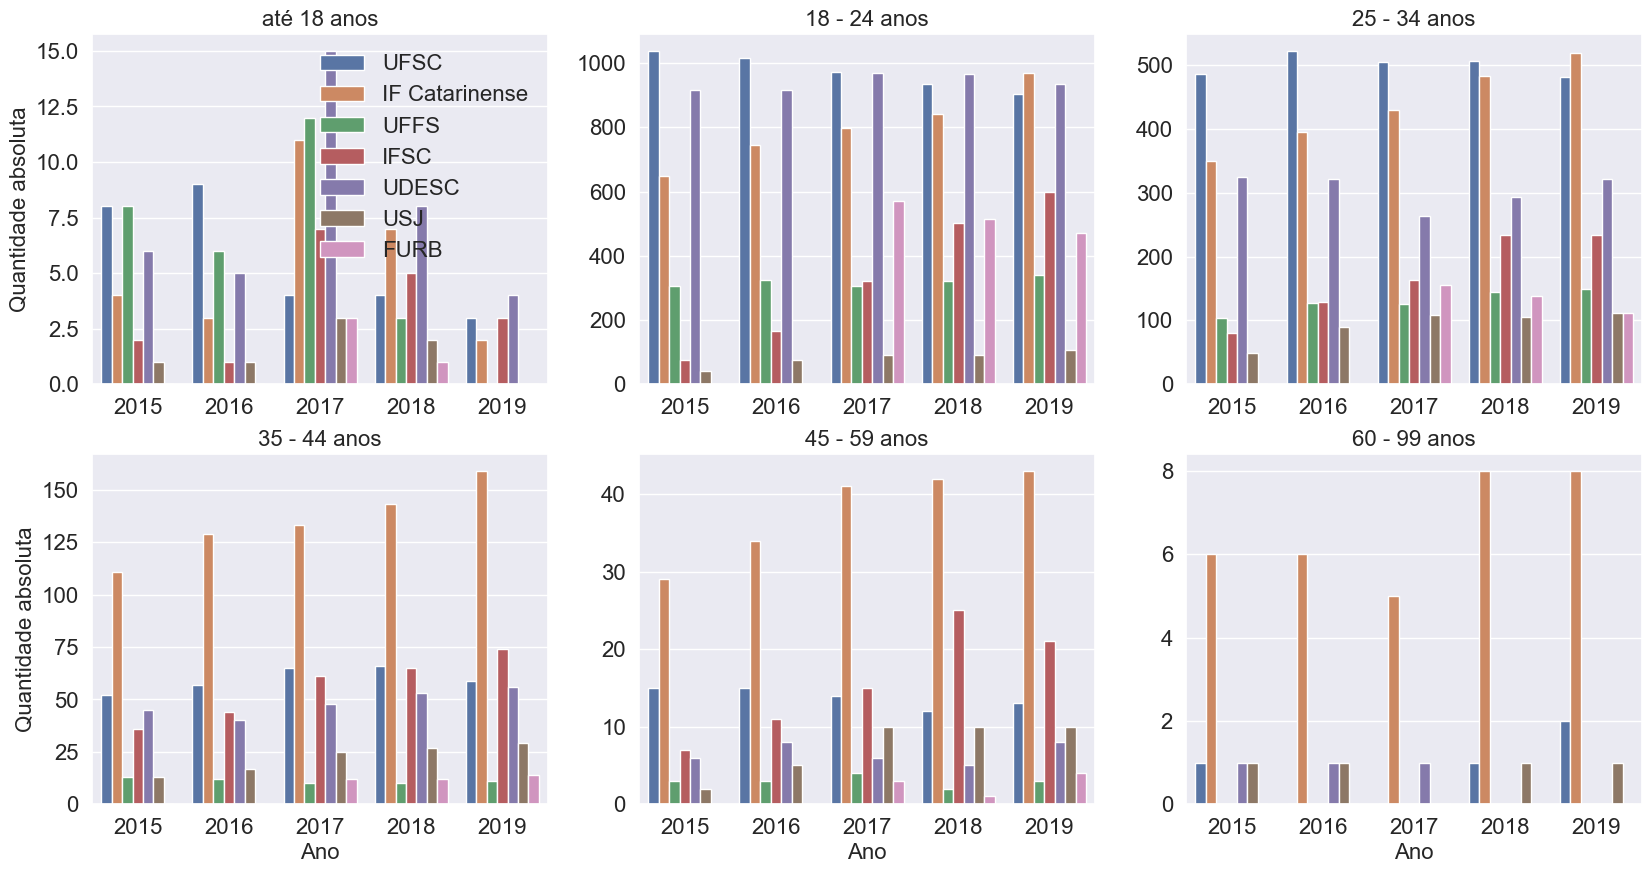

In [135]:
labels = ['até 18 anos', '18 - 24 anos', '25 - 34 anos', '35 - 44 anos',
       '45 - 59 anos', '60 - 99 anos']
df_universidades_idade = df_universidades.loc[df_universidades.categoria == 'NU_IDADE']

gera_graficos(df_universidades_idade, labels, 'qt_abs', 'Quantidade absoluta', False)

display(df_universidades_idade)

In [72]:
import plotly.express as px
import pandas as pd
# ['IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 
#  'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
#  'IN_RESERVA_OUTRA']
# df = pd.DataFrame(dict(
#     r=[1, 5, 2, 2, 3],
#     theta=['processing cost','mechanical properties','chemical stability',
#            'thermal stability', 'device integration']))
fig = px.line_polar(reserva, r='media', theta='valor', line_close=True)
fig.show()

/opt/homebrew/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [81]:
import plotly.graph_objects as go

categories = ['IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 
 'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
 'IN_RESERVA_OUTRA']

fig = go.Figure()
# print(reserva.universidade.unique())
unis = reserva.universidade.unique().tolist()
medias_v = []
for i in range(len(unis)):
  medias = reserva.loc[(reserva.universidade == unis[i]) & (reserva.ano == 2015)].media.tolist()
  medias_v.append(medias)
  print( )
  fig.add_trace(go.Scatterpolar(
        r=medias,
        theta=categories,
        name=unis[i]
  ))
# fig.add_trace(go.Scatterpolar(
#       r=[4, 3, 2.5, 1, 2],
#       theta=categories,
#       fill='toself',
#       name='Product B'
# ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
      # range=[0, 5]
    )),
  showlegend=False
)

fig.show()

In [106]:
import plotly.express as px

print(medias_v)
# data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]

fig = px.imshow(medias_v,
                labels=dict(x="2015", y="Universidades", origin='lower'),
                x=categories,
                color_continuous_scale='Viridis',
                y=unis,
                text_auto=True, aspect="auto"
               )
# fig.update_xaxes()
fig.show()

[[5.3125, 0.0, 20.3125, 0.0, 0.0], [2.175805047867711, 0.0, 22.36727589208007, 6.788511749347259, 0.0], [6.0046189376443415, 0.0, 47.34411085450346, 21.939953810623557, 2.3094688221709005], [4.477611940298507, 0.0, 22.388059701492537, 10.945273631840797, 0.0], [2.540415704387991, 0.0, 15.242494226327944, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0]]


In [14]:
df_forma_ingresso.head()

universidade   ano       categoria                           valor  qt_abs  \
0         UFSC  2015  forma_ingresso   IN_INGRESSO_AVALIACAO_SERIADA       0   
1         UFSC  2015  forma_ingresso                IN_INGRESSO_ENEM      22   
2         UFSC  2015  forma_ingresso          IN_INGRESSO_VESTIBULAR    1459   
3         UFSC  2015  forma_ingresso  IN_INGRESSO_SELECAO_SIMPLIFICA       0   
4         UFSC  2015  forma_ingresso  IN_INGRESSO_OUTRO_TIPO_SELECAO       0   

     media  
0   0.0000  
1   1.3750  
2  91.1875  
3   0.0000  
4   0.0000

In [15]:
unis = df_forma_ingresso.universidade.unique().tolist()
medias_v = []
for i in range(len(unis)):
  medias = df_forma_ingresso.loc[(df_forma_ingresso.universidade == unis[i]) & (df_forma_ingresso.ano == 2015)].media.tolist()
  medias_v.append(medias)
medias_v

[[0.0, 1.375, 91.1875, 0.0, 0.0, 7.1875, 0.0, 0.125, 0.0, 0.125, 0.0, 0.0],
 [0.0,
  31.24456048738033,
  41.86248912097476,
  18.102697998259355,
  0.0,
  8.790252393385552,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  82.90993071593533,
  0.0,
  1.3856812933025404,
  0.0,
  15.473441108545035,
  0.23094688221709006,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  19.402985074626866,
  72.636815920398,
  0.0,
  0.0,
  4.477611940298507,
  0.0,
  3.482587064676617,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  8.852963818321786,
  89.0685142417244,
  0.0,
  0.0,
  1.924557351809084,
  0.0,
  0.0,
  0.07698229407236336,
  0.07698229407236336,
  0.0,
  0.0],
 [0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [138]:
import numpy as np

def gera_heatmap_anos(data:pd.DataFrame, ano, vetor_form_ingresso):
  unis = data.universidade.unique().tolist()
  vetor = []
  for i in range(len(unis)):
    medias = data.loc[(data.universidade == unis[i]) & (data.ano == ano)].media.tolist()
    for x in medias:
      vetor.append(x)
  #  vetor = gerar_taxas_evasao(base_dados_n1, base_dados_n2)
  vetor_genero = unis
  tam = len(vetor_form_ingresso)

  x = np.array(np.tile(vetor_form_ingresso, len(vetor_genero)))
  y = np.array(np.repeat(vetor_genero, tam))
  z = np.array(vetor)

  dfn1_n2 = pd.DataFrame.from_dict(np.array([x,y,z]).T)
  dfn1_n2.columns = ['Seleção','Universidades','%']
  dfn1_n2['%'] = pd.to_numeric(dfn1_n2['%'])
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')

  plt.figure(figsize=(9,16))

  pivotted_n1_n2.index = pd.CategoricalIndex(pivotted_n1_n2.index, categories=vetor_form_ingresso)
  pivotted_n1_n2.sort_index(level=0, inplace=True)
  # sns.heatmap(pivotted_n1_n2,annot=True, linewidths=4, fmt='0.2f')
  return pivotted_n1_n2

### Forma de ingresso

#### preparando para fazer os heatmaps

In [196]:
vetor_form_ingresso = ['IN_INGRESSO_AVALIACAO_SERIADA','IN_INGRESSO_ENEM', 'IN_INGRESSO_VESTIBULAR', 
   'IN_INGRESSO_SELECAO_SIMPLIFICA', 'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
   'IN_INGRESSO_VAGA_PROG_ESPECIAL', 'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL',
   'IN_INGRESSO_CONVENIO_PECG', 'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']
pivotted2015 = gera_heatmap_anos(df_forma_ingresso, 2015, vetor_form_ingresso)
pivotted2016 = gera_heatmap_anos(df_forma_ingresso, 2016, vetor_form_ingresso)
pivotted2017 = gera_heatmap_anos(df_forma_ingresso, 2017, vetor_form_ingresso)
pivotted2018 = gera_heatmap_anos(df_forma_ingresso, 2018, vetor_form_ingresso)
pivotted2019 = gera_heatmap_anos(df_forma_ingresso, 2019, vetor_form_ingresso)

/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dfn1_n2 = pd.DataFrame.from_dict(np.array([x,y,z]).T)


ValueError: Length mismatch: Expected axis has 1 elements, new values have 3 elements

In [201]:
vetor_form_ingresso = ['Enem', 'Vestibular', 
   'Seleção simplificada', 'Vaga remanescente',
   'Vaga especial', 'Transferência', 'Decisão judicial',
   'Convênio']

map_ingresso = {
   'valor':{
      'IN_INGRESSO_ENEM': 'Enem',
      'IN_INGRESSO_VESTIBULAR': 'Vestibular', 
      'IN_INGRESSO_SELECAO_SIMPLIFICA': 'Seleção simplificada', 
      'IN_INGRESSO_VAGA_REMANESC': 'Vaga remanescente',
      'IN_INGRESSO_VAGA_PROG_ESPECIAL': 'Vaga especial',
      'IN_INGRESSO_TRANSF_EXOFFICIO': 'Transferência', 
      'IN_INGRESSO_DECISAO_JUDICIAL': 'Decisão judicial',
      'IN_INGRESSO_CONVENIO_PECG': 'Convênio'
   }
}
df_forma_ingresso_reduzida = df_forma_ingresso.loc[df_forma_ingresso.replace(map_ingresso).valor.isin(vetor_form_ingresso)]
pivotted_1_2015 = gera_heatmap_anos(df_forma_ingresso_reduzida.replace(map_ingresso), 2015, vetor_form_ingresso)
pivotted_1_2016 = gera_heatmap_anos(df_forma_ingresso_reduzida.replace(map_ingresso), 2016, vetor_form_ingresso)
pivotted_1_2017 = gera_heatmap_anos(df_forma_ingresso_reduzida.replace(map_ingresso), 2017, vetor_form_ingresso)
pivotted_1_2018 = gera_heatmap_anos(df_forma_ingresso_reduzida.replace(map_ingresso), 2018, vetor_form_ingresso)
pivotted_1_2019 = gera_heatmap_anos(df_forma_ingresso_reduzida.replace(map_ingresso), 2019, vetor_form_ingresso)

/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw6

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

#### Plotando

In [249]:
from matplotlib.colors import BoundaryNorm, ListedColormap

def criar_heatmap(pivotted2015,pivotted2016,pivotted2017,pivotted2018,pivotted2019,vmax=100):
    fig, axes = plt.subplots(1, 5, figsize=(55, 15), sharey=True)
    # plt.subplots_adjust(right = 0.9)
    plt.tight_layout()
    sns.set(font_scale = 2.8)
    
    # cmap = sns.color_palette("Blues", as_cmap=True)
    cmap = sns.color_palette("Blues", as_cmap=True)
    ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50, 80, 100]
    # my_norm = BoundaryNorm(bounds, ncolors=len(bounds))
    sns.heatmap(pivotted2015,annot=True, linewidths=0.3, fmt='.1f', ax=axes[0],
                cbar = False, cmap=cmap, vmin = 0, vmax = vmax, mask = pivotted2015 <= 0)
    axes[0].set_title('2015')
    axes[0].set_xlabel('')
    # axes[0].set_ylabel('Forma de Ingresso')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45)
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation = 0)
    axes[0].set_ylabel('')

    sns.heatmap(pivotted2016,annot=True, linewidths=0.3, fmt='.1f', ax=axes[1], 
                cbar = False, cmap=cmap, vmin = 0, vmax = vmax ,mask = pivotted2016 <= 0)
    axes[1].set_title('2016')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45)

    sns.heatmap(pivotted2017,annot=True, linewidths=0.3, fmt='.1f', ax=axes[2],
                cbar = False, cmap=cmap, vmin = 0, vmax = vmax ,mask = pivotted2017 <= 0)
    axes[2].set_title('2017')
    axes[2].set_ylabel('')
    axes[2].set_xlabel('')
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 45)

    sns.heatmap(pivotted2018,annot=True, linewidths=0.3, fmt='.1f', ax=axes[3],
                cbar = False, cmap=cmap, vmin = 0, vmax = vmax ,mask = pivotted2018 <= 0)
    axes[3].set_title('2018')
    axes[3].set_ylabel('')
    axes[3].set_xlabel('')
    axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation = 45)

    sns.heatmap(pivotted2019, annot=True, linewidths=0.3, fmt='.1f',
                ax=axes[4], vmin = 0, cmap=cmap, vmax = vmax, mask = pivotted2019 <= 0)
    axes[4].set_title('2019')
    axes[4].set_ylabel('')
    # ax[4].set_yticks(ticks)
    axes[4].set_xlabel('')
    axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation = 45)

Plot com todas as formas de ingresso

Plot com apenas as formas de ingresso que não estão zeradas

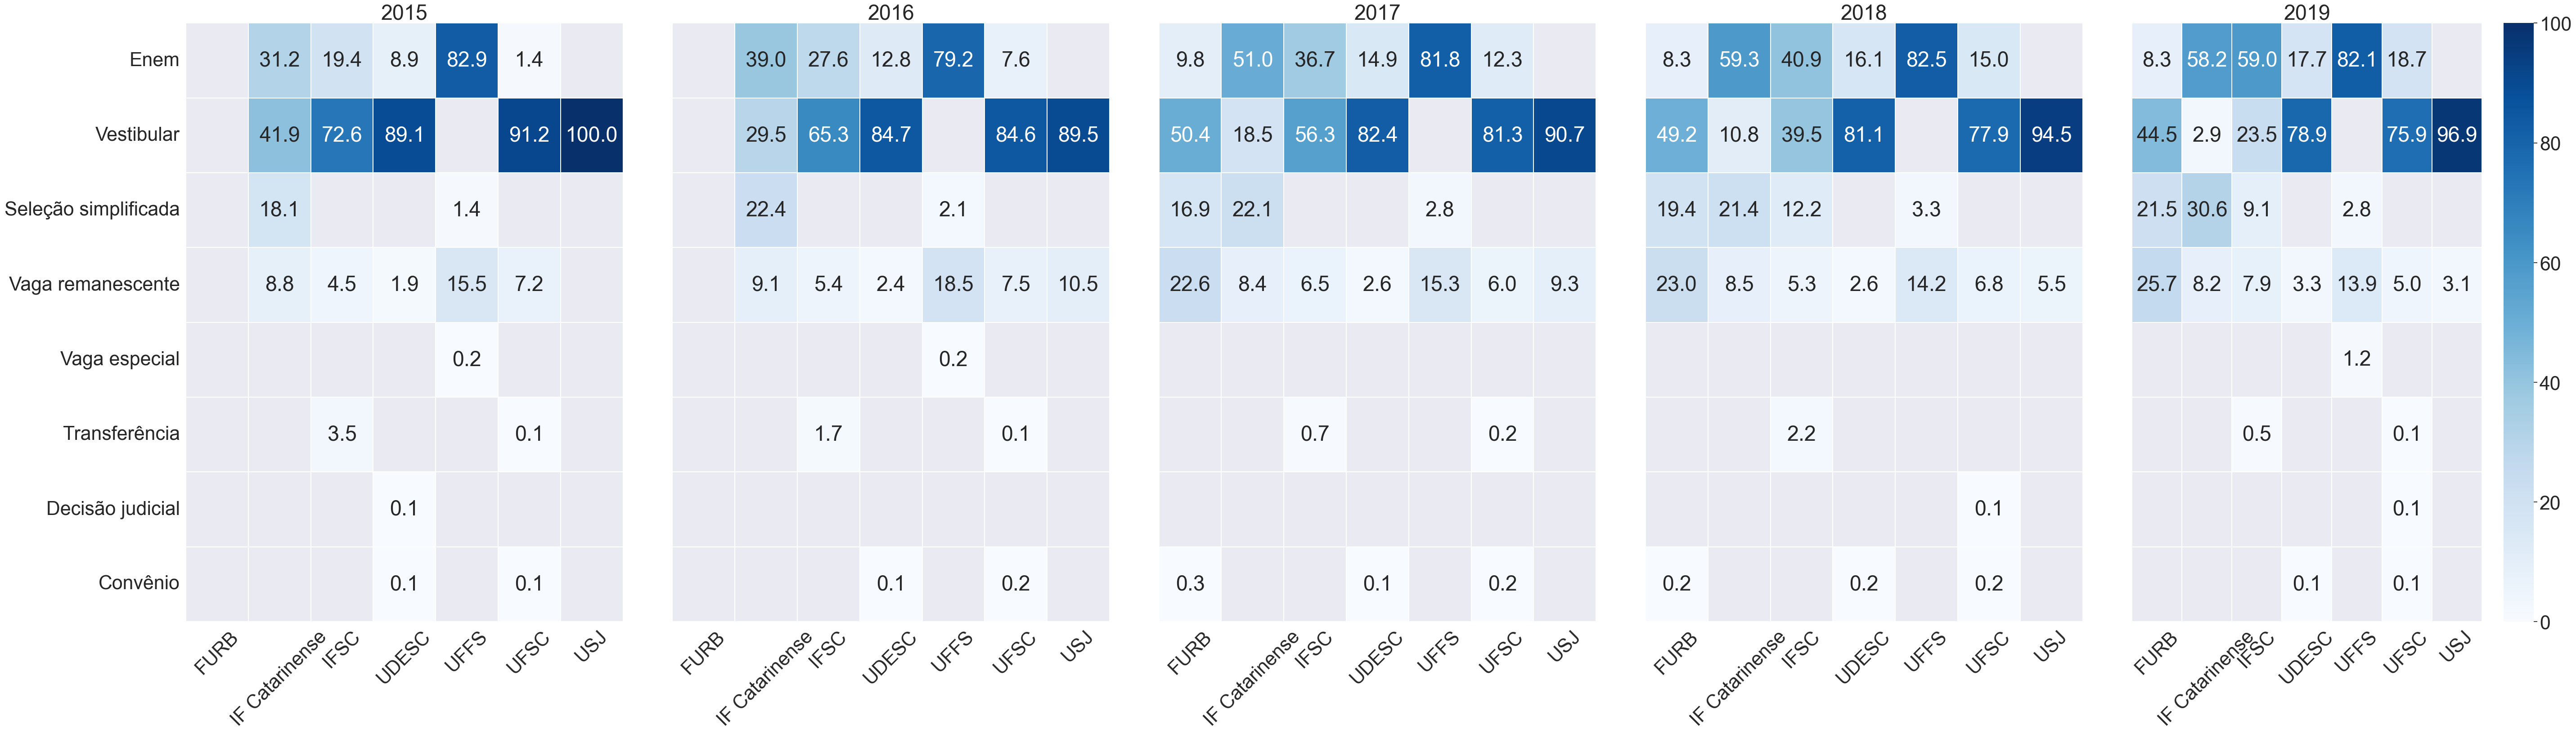

In [250]:
criar_heatmap(pivotted_1_2015,pivotted_1_2016,pivotted_1_2017,pivotted_1_2018,pivotted_1_2019, vmax=100)

### Idade

### Tipo de Vaga

In [252]:
categories = ['Étnico', 'Deficiência', 
 'Ensino público', 'Renda familiar',
 'Outra']

map_ingresso = {
   'valor':{
      'IN_INGRESSO_ENEM': 'Enem',
      'IN_INGRESSO_VESTIBULAR': 'Vestibular', 
      'IN_INGRESSO_SELECAO_SIMPLIFICA': 'Seleção simplificada', 
      'IN_INGRESSO_VAGA_REMANESC': 'Vaga remanescente',
      'IN_INGRESSO_VAGA_PROG_ESPECIAL': 'Vaga especial',
      'IN_INGRESSO_TRANSF_EXOFFICIO': 'Transferência', 
      'IN_INGRESSO_DECISAO_JUDICIAL': 'Decisão judicial',
      'IN_INGRESSO_CONVENIO_PECG': 'Convênio',
      
      'IN_RESERVA_ETNICO':'Étnico', 
      'IN_RESERVA_DEFICIENCIA':'Deficiência', 
      'IN_RESERVA_ENSINO_PUBLICO':'Ensino público', 
      'IN_RESERVA_RENDA_FAMILIAR':'Renda familiar',
      'IN_RESERVA_OUTRA':'Outra'
   }
}
reserva_reduzida = reserva.loc[reserva.replace(map_ingresso).valor.isin(categories)]
pivotted_2_2015 = gera_heatmap_anos(reserva_reduzida.replace(map_ingresso), 2015, categories)
pivotted_2_2016 = gera_heatmap_anos(reserva_reduzida.replace(map_ingresso), 2016, categories)
pivotted_2_2017 = gera_heatmap_anos(reserva_reduzida.replace(map_ingresso), 2017, categories)
pivotted_2_2018 = gera_heatmap_anos(reserva_reduzida.replace(map_ingresso), 2018, categories)
pivotted_2_2019 = gera_heatmap_anos(reserva_reduzida.replace(map_ingresso), 2019, categories)

/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw6

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

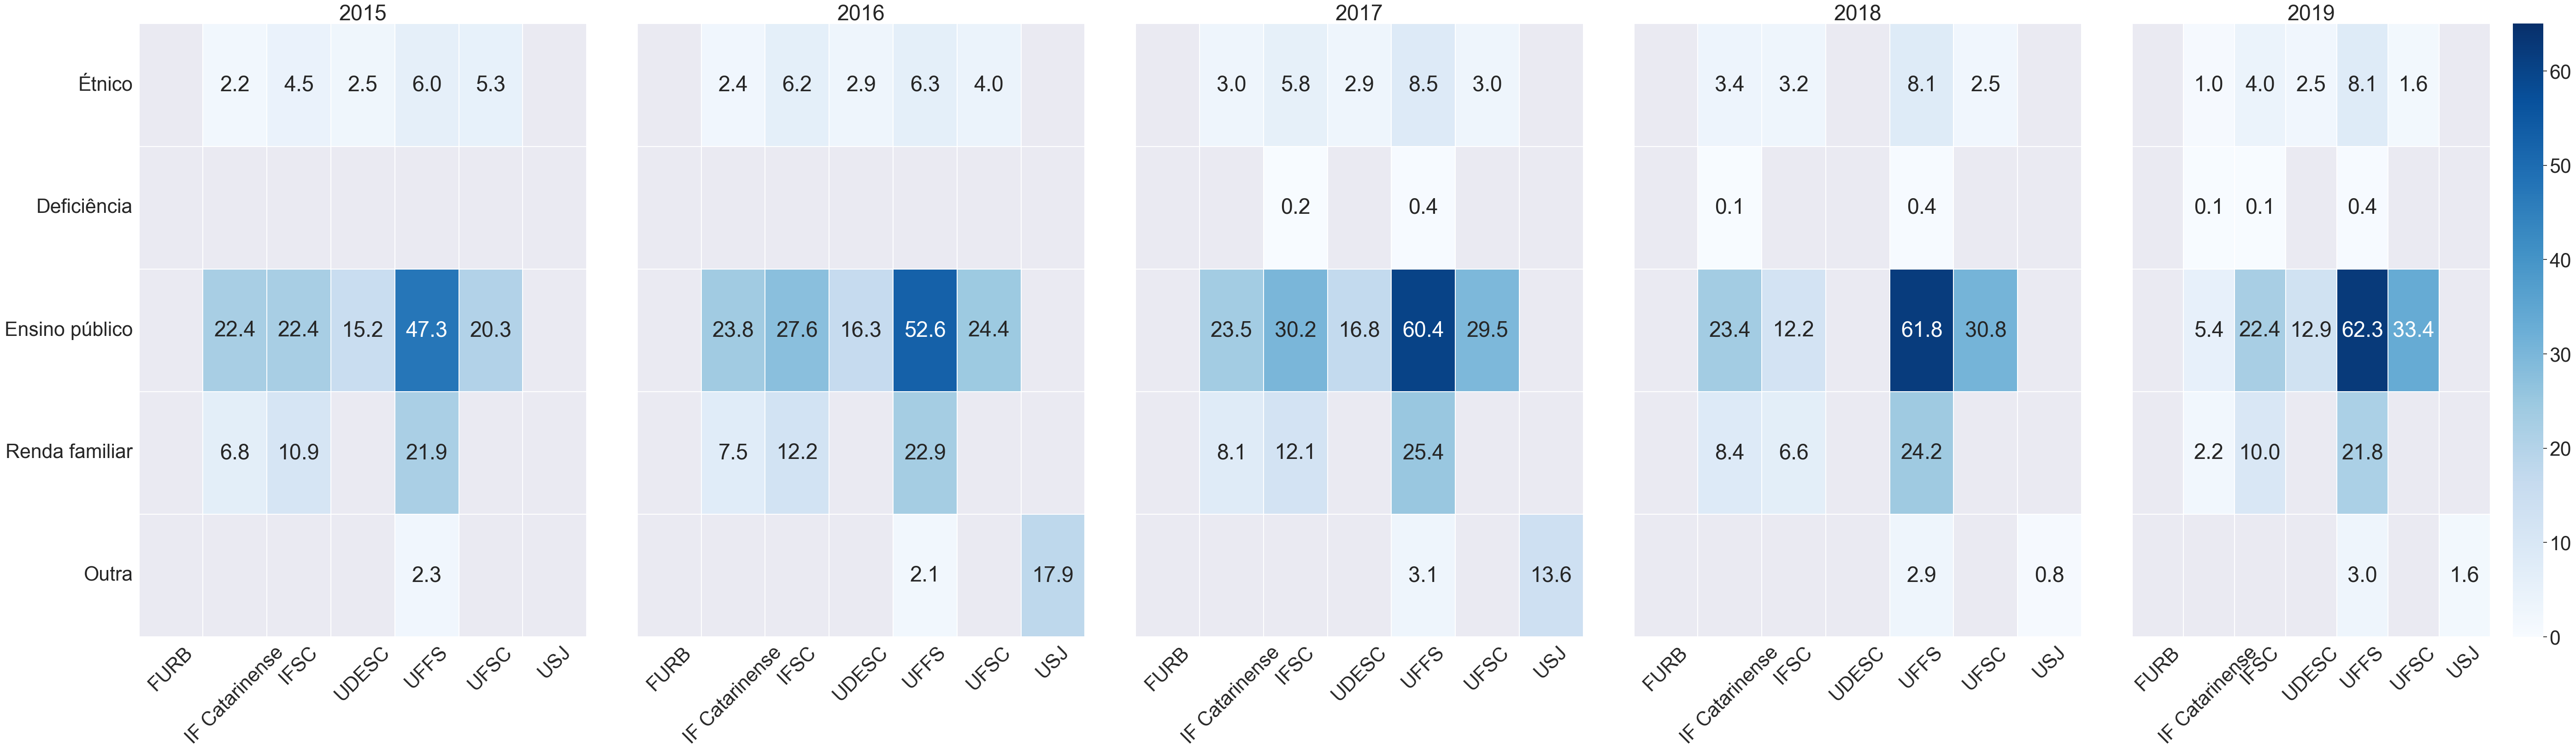

In [253]:
criar_heatmap(pivotted_2_2015,pivotted_2_2016,pivotted_2_2017,pivotted_2_2018,pivotted_2_2019, vmax=65)

In [254]:
categories = ['até 18 anos', '18 - 24 anos', '25 - 34 anos', '35 - 44 anos',
       '45 - 59 anos', '60 - 99 anos']

map_ingresso = {
   'valor':{
      'IN_INGRESSO_ENEM': 'Enem',
      'IN_INGRESSO_VESTIBULAR': 'Vestibular', 
      'IN_INGRESSO_SELECAO_SIMPLIFICA': 'Seleção simplificada', 
      'IN_INGRESSO_VAGA_REMANESC': 'Vaga remanescente',
      'IN_INGRESSO_VAGA_PROG_ESPECIAL': 'Vaga especial',
      'IN_INGRESSO_TRANSF_EXOFFICIO': 'Transferência', 
      'IN_INGRESSO_DECISAO_JUDICIAL': 'Decisão judicial',
      'IN_INGRESSO_CONVENIO_PECG': 'Convênio',
      
      'IN_RESERVA_ETNICO':'Étnico', 
      'IN_RESERVA_DEFICIENCIA':'Deficiência', 
      'IN_RESERVA_ENSINO_PUBLICO':'Ensino público', 
      'IN_RESERVA_RENDA_FAMILIAR':'Renda familiar',
      'IN_RESERVA_OUTRA':'Outra'
   }
}
df_universidades_idade_reduzida = df_universidades_idade.loc[df_universidades_idade.replace(map_ingresso).valor.isin(categories)]
pivotted_3_2015 = gera_heatmap_anos(df_universidades_idade_reduzida.replace(map_ingresso), 2015, categories)
pivotted_3_2016 = gera_heatmap_anos(df_universidades_idade_reduzida.replace(map_ingresso), 2016, categories)
pivotted_3_2017 = gera_heatmap_anos(df_universidades_idade_reduzida.replace(map_ingresso), 2017, categories)
pivotted_3_2018 = gera_heatmap_anos(df_universidades_idade_reduzida.replace(map_ingresso), 2018, categories)
pivotted_3_2019 = gera_heatmap_anos(df_universidades_idade_reduzida.replace(map_ingresso), 2019, categories)

/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw6

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

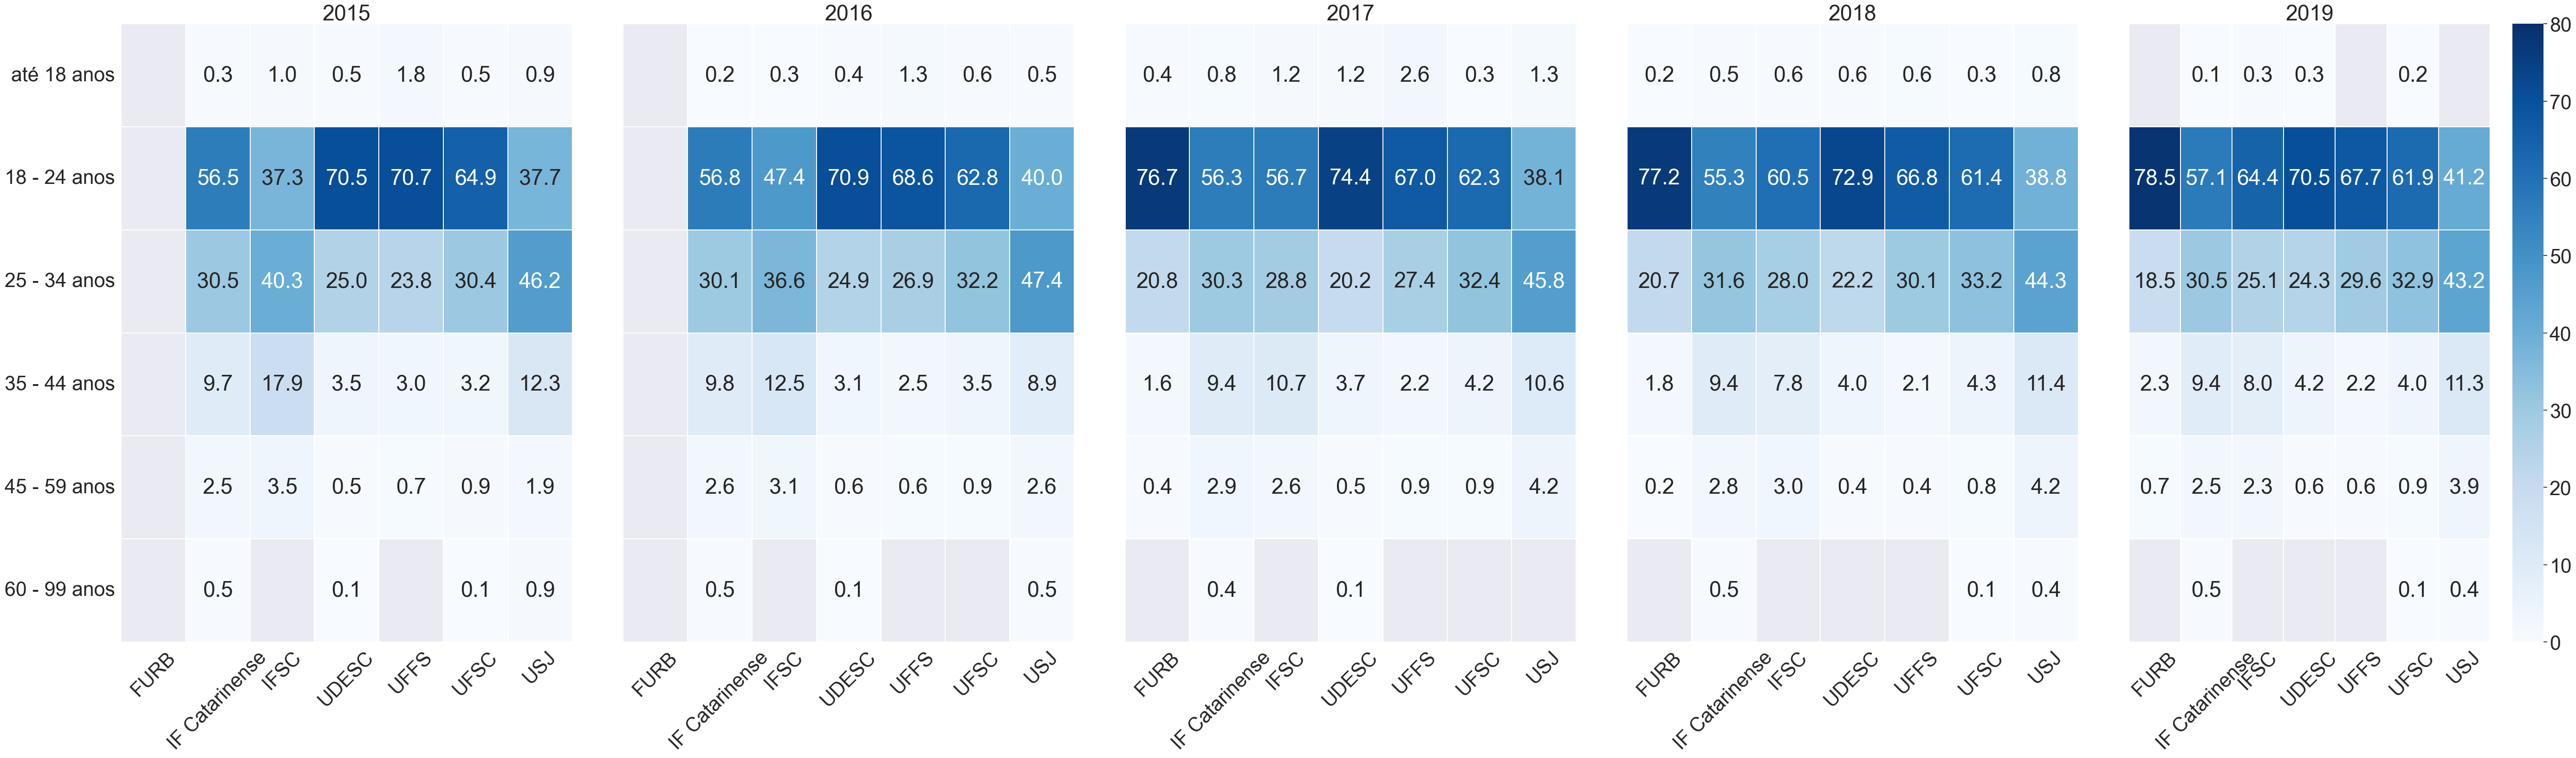

In [255]:
criar_heatmap(pivotted_3_2015,pivotted_3_2016,pivotted_3_2017,pivotted_3_2018,pivotted_3_2019, vmax=80)

In [256]:
categories = ['Auditiva',
'Física',
'Intelectual',
'Múltipla',
'Surdez',
'Baixa visão',
'Cegueira',
'Superdotação',
'Autismo',
'Síndrome Asperger',
'Síndrome Rett',
'Transtorno desintegrativo']

map_ingresso = {
   'valor':{
      'IN_INGRESSO_ENEM': 'Enem',
      'IN_INGRESSO_VESTIBULAR': 'Vestibular', 
      'IN_INGRESSO_SELECAO_SIMPLIFICA': 'Seleção simplificada', 
      'IN_INGRESSO_VAGA_REMANESC': 'Vaga remanescente',
      'IN_INGRESSO_VAGA_PROG_ESPECIAL': 'Vaga especial',
      'IN_INGRESSO_TRANSF_EXOFFICIO': 'Transferência', 
      'IN_INGRESSO_DECISAO_JUDICIAL': 'Decisão judicial',
      'IN_INGRESSO_CONVENIO_PECG': 'Convênio',
      
      'IN_RESERVA_ETNICO':'Étnico', 
      'IN_RESERVA_DEFICIENCIA':'Deficiência', 
      'IN_RESERVA_ENSINO_PUBLICO':'Ensino público', 
      'IN_RESERVA_RENDA_FAMILIAR':'Renda familiar',
      'IN_RESERVA_OUTRA':'Outra',
      
      'IN_DEFICIENCIA_AUDITIVA': 'Auditiva',
      'IN_DEFICIENCIA_FISICA': 'Física',
      'IN_DEFICIENCIA_INTELECTUAL': 'Intelectual',
      'IN_DEFICIENCIA_MULTIPLA': 'Múltipla',
      'IN_DEFICIENCIA_SURDEZ': 'Surdez',
      'IN_DEFICIENCIA_BAIXA_VISAO': 'Baixa visão',
      'IN_DEFICIENCIA_CEGUEIRA': 'Cegueira',
      'IN_DEFICIENCIA_SUPERDOTACAO': 'Superdotação',
      'IN_TGD_AUTISMO': 'Autismo',
      'IN_TGD_SINDROME_ASPERGER': 'Síndrome Asperger',
      'IN_TGD_SINDROME_RETT': 'Síndrome Rett',
      'IN_TGD_TRANSTOR_DESINTEGRATIVO': 'Transtorno desintegrativo'
   }
}
dados_reduzida = dados.loc[dados.replace(map_ingresso).valor.isin(categories)]
pivotted_4_2015 = gera_heatmap_anos(dados_reduzida.replace(map_ingresso), 2015, categories)
pivotted_4_2016 = gera_heatmap_anos(dados_reduzida.replace(map_ingresso), 2016, categories)
pivotted_4_2017 = gera_heatmap_anos(dados_reduzida.replace(map_ingresso), 2017, categories)
pivotted_4_2018 = gera_heatmap_anos(dados_reduzida.replace(map_ingresso), 2018, categories)
pivotted_4_2019 = gera_heatmap_anos(dados_reduzida.replace(map_ingresso), 2019, categories)

/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_1068/4061736358.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted_n1_n2= dfn1_n2.pivot('Seleção','Universidades','%')
/var/folders/p6/rfw6

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

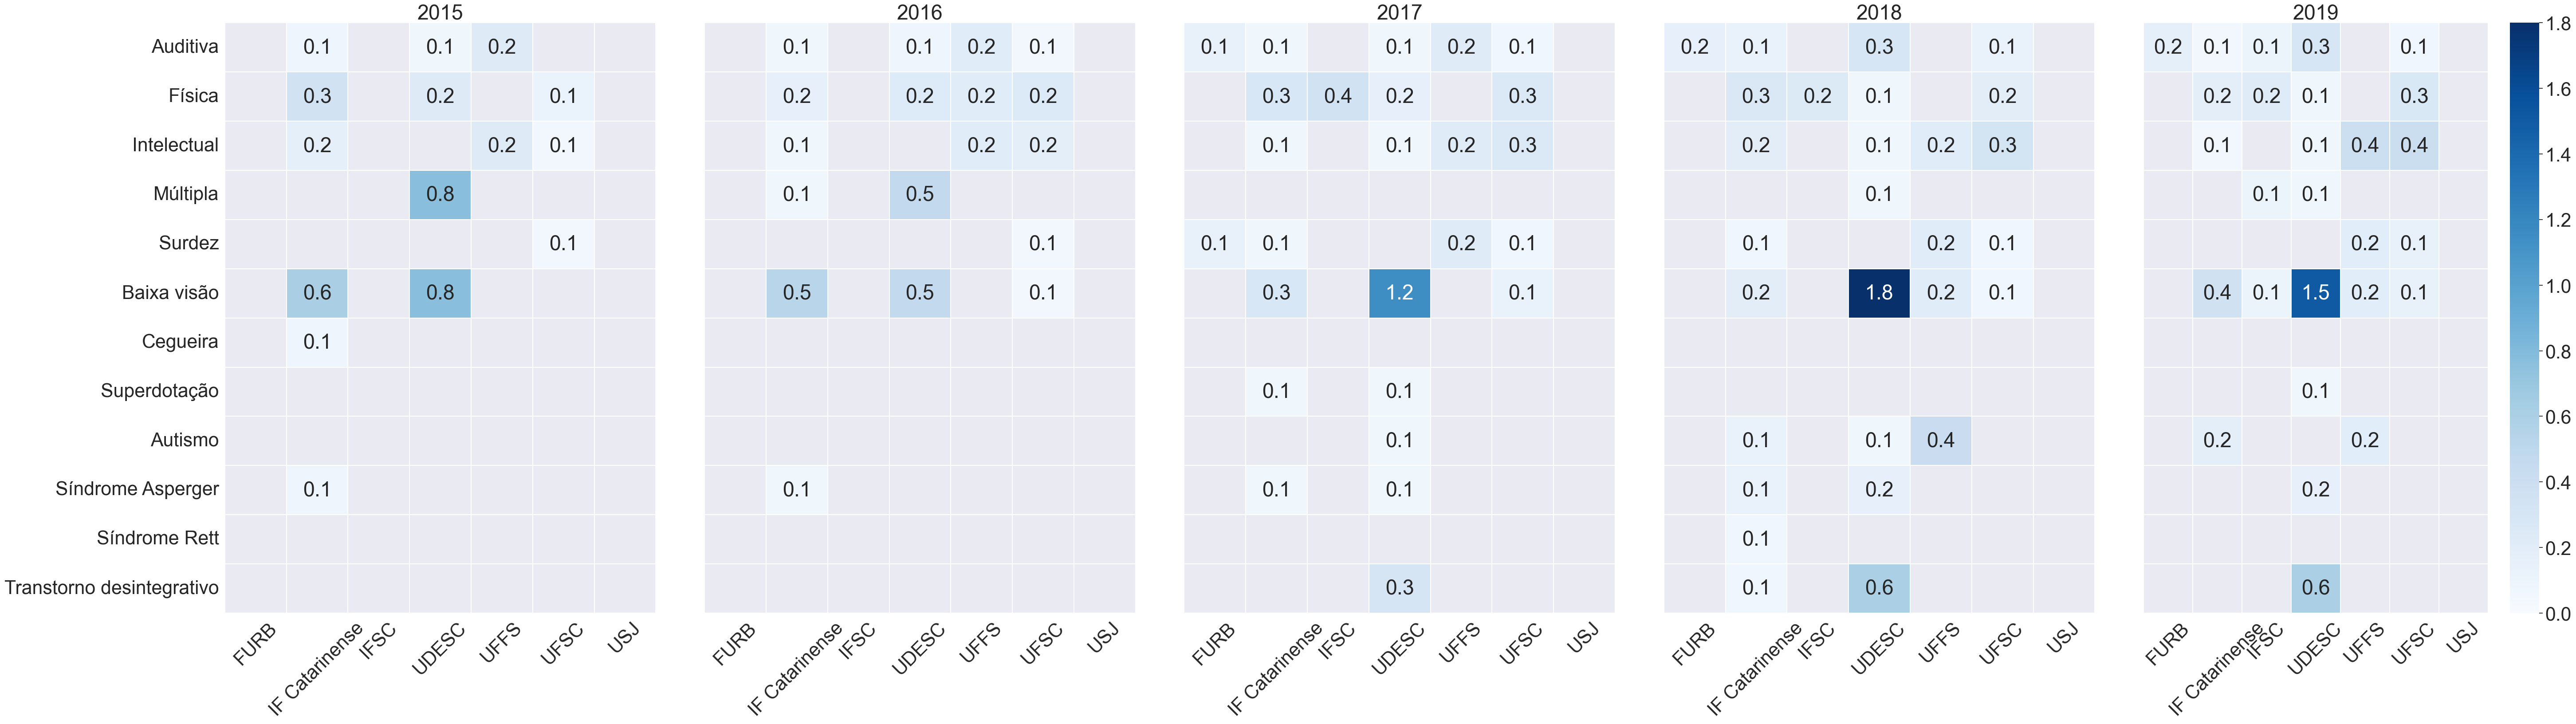

In [257]:
criar_heatmap(pivotted_4_2015,pivotted_4_2016,pivotted_4_2017,pivotted_4_2018,pivotted_4_2019, vmax=1.8)